# Assessing the Impact of Product Specifications and Brand Origin on the Pricing of Mechanical Keyboards in 2025

## Problem Statement
Global supply chains have undergone significant political and economic disruption in recent years, particularly in the technology and consumer electronics industries. 

Mechanical keyboards, an essential component of modern computing and creative work, have become a notable example of how manufacturers have entered the enthusiast market with competitive alternatives.

Historically, branding and design heritage contributed greatly to pricing. However, with increased transparency and direct-to-consumer models from factories, this may no longer hold true.

## Goal
This project aims to use mechanical keyboard listings as a case study to explore whether technical specifications and country/brand of origin still meaningfully influence pricing in 2025.

## Hypothesis
H₀ (Null Hypothesis): Product specifications and brand origin have no significant effect on price.

H₁ (Alternative Hypothesis): Product specifications and brand origin significantly affect price.

## Objectives
- Determine which features (e.g., switch type, brand, layout, connectivity) influence pricing.

- Analyze whether branding and origin remain significant predictors of pricing.

- Provide insights into broader trends of consumer electronics pricing post-supply-chain globalization.



# Seeing what data we are working with

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('keebfinder_keyboards_rev9.csv')


In [2]:
df.shape

(2368, 13)

In [3]:
df.isna().sum()

category         0
brand            0
title            0
price            0
layout           0
mount            0
hall_effect      0
hotswap          0
case_material    0
backlight        0
connectivity     0
screen           0
knob             0
dtype: int64

# Preprocessing
- knowing there are missing values, determine what they are and deal with them
- Find out how to categorize brands to define what is high end, mid tier, or low tier, since this was not included in the dataset
- clean & normalize data to be prepared to be shoved into the ML model

In [4]:
# check for all the missing values in the layout column
df['layout'].unique()

array(['60%', '65%', 'Unknown', '80%', '100%', '75%', '96%', '98%', '95%',
       '40%', '68%', '64%', '66%', '85%', '90%', '70%', '97%', '50%',
       '87%', '78%', '84%'], dtype=object)

In [5]:
#df['layout'] = df['layout'].str.replace(',', '')

In [6]:
#check for all the unique values in the mount column
df['mount'].unique()

array(['Plate Mount', 'Gasket Mount', 'Top Mount', 'Unknown',
       'Tray Mount', 'Sandwich Mount', 'Bottom Mount', 'PCB Mount'],
      dtype=object)

In [7]:
#df['mount'] = df['mount'].str.replace(',', '')

In [8]:
df['case_material'].unique()

array(['Metal (likely Aluminium)', 'Unspecified(likely ABS plastic)'],
      dtype=object)

In [9]:
#df['case_material'] = df['case_material'].str.replace(',', '')

In [10]:
# check for all the unique values in the 'connectivity' column
df['connectivity'].unique()

array(['Wired', 'Unknown', 'Wireless'], dtype=object)

In [11]:
#df['connectivity'] = df['connectivity'].str.replace(',', '')

In [12]:
# fill missing values with 'Unknown' for categorical columns
df['layout'].fillna('Unknown', inplace=True)
df['mount'].fillna('Unknown', inplace=True)
df['case_material'].fillna('Unknown', inplace=True)
df['connectivity'].fillna('Unknown', inplace=True)

/var/folders/04/wngkl13j3hj0s528zj5lpnj00000gn/T/ipykernel_54612/2699668920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['layout'].fillna('Unknown', inplace=True)
/var/folders/04/wngkl13j3hj0s528zj5lpnj00000gn/T/ipykernel_54612/2699668920.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [13]:
# minor mistake in the above code, lazy fix ^^
#df['case_material'].replace(to_replace="Unknown",
#         value="Unspecified(likely ABS plastic)", inplace=True)
#df['case_material'].replace(to_replace="Alu case",
#         value="Metal (likely Aluminium)", inplace=True)
#df.tail()


In [14]:
# # extract brand from title n make a new column
# df['brand'] = df['title'].str.split().str[0]
# # df.head()

# #reorder the columns to make brand go first
# df = df[['brand', 'title', 'price', 'layout', 'mount', 'hall_effect', 'hotswap', 'case_material', 'backlight', 'connectivity', 'screen', 'knob']]
# df.head()



# categorizing brands

## Price-Based Categorization with Brand Context

FLOW

- Calculate the average price for each brand

- Calculate the price range (min, max, standard deviation) for each brand

Use these metrics to categorize brands

This would help account for brands that offer both high-end and budget options. For example:
- If a brand's average price is high but has a wide range, it might be a "premium" brand that also offers budget options
- If a brand's average price is low with a narrow range, it's likely a "budget" brand
- If a brand's average price is moderate with some variation, it might be "midrange"


In [15]:
# df = df.drop('brand_category', axis=1)

# df.to_csv('keebfinder_keyboards_rev7.csv', index=False)

# #new brand categorization approach (!GPT SUGGESTION)
# # Calculate brand statistics (!GPT CODE)

# brand_stats = df.groupby('brand').agg({
#     'price': ['mean', 'min', 'max', 'std', 'count']
# }).reset_index()

# # # name cols
# brand_stats.columns = ['brand', 'avg_price', 'min_price', 'max_price', 'price_std', 'product_count']

# df_brand_stats = brand_stats.copy()

# df_brand_stats.to_csv('brand_stats.csv', index=False)

# # Calculate price percentiles for the entire dataset (!GPT CODE)

# # First, convert price strings to numeric values (removing '$' and ',' characters)
# df['price_numeric'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# price_percentiles = df['price_numeric'].quantile([0.33, 0.66]) (!GPT CODE)

# # Define brand categories based on multiple metrics (!GPT SUGGESTION)

# (!GPT CODE)
# def categorize_brand(row):
#     avg_price = row['avg_price']
#     price_std = row['price_std']
#     price_range = row['max_price'] - row['min_price']
    
#     # Premium: High average price OR wide price range with high max

#     if avg_price > price_percentiles[0.66] or (price_range > 100 and row['max_price'] > price_percentiles[0.66]):
#         return 'premium'
#     # Budget: Low average price AND narrow price range

#     elif avg_price < price_percentiles[0.33] and price_range < 50:
#         return 'budget'
#     # Midrange: Everything else

#     else:
#         return 'midrange'

# # apply cats
# brand_stats['category'] = brand_stats.apply(categorize_brand, axis=1)

# # results
# print("\nPrice Percentiles:")
# print(f"33rd percentile: ${price_percentiles[0.33]:.2f}")
# print(f"66th percentile: ${price_percentiles[0.66]:.2f}")

# print("\nBrand Categories:")
# print(brand_stats[['brand', 'category', 'avg_price', 'min_price', 'max_price', 'product_count']].sort_values('avg_price', ascending=False))

# # ddd cats back 2 main dataframe
# df = df.merge(brand_stats[['brand', 'category']], on='brand', how='left')

# sahaja i want the brand_category to be the first column
#df = df[['brand_category','brand', 'title', 'price', 'layout', 'mount', 'hall_effect', 'hotswap', 'case_material', 'backlight', 'connectivity', 'screen', 'knob']]

# save new categorized dataset
#df.to_csv('keebfinder_keyboards_rev8.csv', index=False)

# Preparing the data for EDA / ML model

- Clean data, like columns price should be numeric, maybe layout convert to numeric too
- Normalize the data, so binary cols like hall effect, hotswap, backlight, screen, knob can all be converted to numeric values, eg. 0 | 1

In [16]:
df

category      brand                            title  price   layout  \
0       budget       0.01                         0.01 Z62   59.0      60%   
1       budget       0.01             0.01 Z62 Blank Blank   59.0      60%   
2      premium   80retros        80retros GB65 X Click Inc  169.0      65%   
3      premium   80retros  80retros Pad Numpad X Click Inc  129.0  Unknown   
4     midrange     8BitDo                     8BitDo Retro  119.0      80%   
...        ...        ...                              ...    ...      ...   
2363   premium  zFrontier      zFrontier Y2K 76 Metropolis  215.0      75%   
2364   premium  zFrontier         zFrontier Y2K 76 Redline  195.0      75%   
2365   premium  zFrontier   zFrontier Y2K 76 Strong Spirit  195.0      75%   
2366   premium  zFrontier       zFrontier Y2K 76 Superuser  165.0      75%   
2367   premium  zFrontier    zFrontier Y2K 76 Terror Below  265.0      75%   

             mount  hall_effect  hotswap                    case_material  \
0      Plate Mount            0        0         Metal (likely Aluminium)   
1      Plate Mount            0        0         Metal (likely Aluminium)   
2     Gasket Mount            0        1         Metal (likely Aluminium)   
3     Gasket Mount            0        1         Metal (likely Aluminium)   
4        Top Mount            0        1         Metal (likely Aluminium)   
...            ...          ...      ...                              ...   
2363     Top Mount            0        1  Unspecified(likely ABS plastic)   
2364     Top Mount            0        1  Unspecified(likely ABS plastic)   
2365     Top Mount            0        1  Unspecified(likely ABS plastic)   
2366     Top Mount            0        1  Unspecified(likely ABS plastic)   
2367     Top Mount            0        1  Unspecified(likely ABS plastic)   

      backlight connectivity  screen  knob  
0             1        Wired       0     0  
1             1        Wired       0     0  
2             0        Wired       0     0  
3             0      Unknown       0     0  
4             0     Wireless       0     1  
...         ...          ...     ...   ...  
2363          0      Unknown       1     1  
2364          0      Unknown       1     1  
2365          0      Unknown       1     1  
2366          1      Unknown       1     1  
2367          0      Unknown       1     1  

[2368 rows x 13 columns]

In [17]:
# convert price to float
# df['price'] = df['price'].str.replace('$', '').astype(float)
# df

In [18]:
# # convert binary cols
# df['hall_effect'] = df['hall_effect'].map({'yes': 1, 'no': 0})
# df['hotswap'] = df['hotswap'].map({'yes': 1, 'no': 0})
# df['backlight'] = df['backlight'].map({'yes': 1, 'no': 0})
# df['screen'] = df['screen'].map({'yes': 1, 'no': 0})
# df['knob'] = df['knob'].map({'yes': 1, 'no': 0})

# EDA

## which features impact price?

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df

category      brand                            title  price   layout  \
0       budget       0.01                         0.01 Z62   59.0      60%   
1       budget       0.01             0.01 Z62 Blank Blank   59.0      60%   
2      premium   80retros        80retros GB65 X Click Inc  169.0      65%   
3      premium   80retros  80retros Pad Numpad X Click Inc  129.0  Unknown   
4     midrange     8BitDo                     8BitDo Retro  119.0      80%   
...        ...        ...                              ...    ...      ...   
2363   premium  zFrontier      zFrontier Y2K 76 Metropolis  215.0      75%   
2364   premium  zFrontier         zFrontier Y2K 76 Redline  195.0      75%   
2365   premium  zFrontier   zFrontier Y2K 76 Strong Spirit  195.0      75%   
2366   premium  zFrontier       zFrontier Y2K 76 Superuser  165.0      75%   
2367   premium  zFrontier    zFrontier Y2K 76 Terror Below  265.0      75%   

             mount  hall_effect  hotswap                    case_material  \
0      Plate Mount            0        0         Metal (likely Aluminium)   
1      Plate Mount            0        0         Metal (likely Aluminium)   
2     Gasket Mount            0        1         Metal (likely Aluminium)   
3     Gasket Mount            0        1         Metal (likely Aluminium)   
4        Top Mount            0        1         Metal (likely Aluminium)   
...            ...          ...      ...                              ...   
2363     Top Mount            0        1  Unspecified(likely ABS plastic)   
2364     Top Mount            0        1  Unspecified(likely ABS plastic)   
2365     Top Mount            0        1  Unspecified(likely ABS plastic)   
2366     Top Mount            0        1  Unspecified(likely ABS plastic)   
2367     Top Mount            0        1  Unspecified(likely ABS plastic)   

      backlight connectivity  screen  knob  
0             1        Wired       0     0  
1             1        Wired       0     0  
2             0        Wired       0     0  
3             0      Unknown       0     0  
4             0     Wireless       0     1  
...         ...          ...     ...   ...  
2363          0      Unknown       1     1  
2364          0      Unknown       1     1  
2365          0      Unknown       1     1  
2366          1      Unknown       1     1  
2367          0      Unknown       1     1  

[2368 rows x 13 columns]

### binary cols

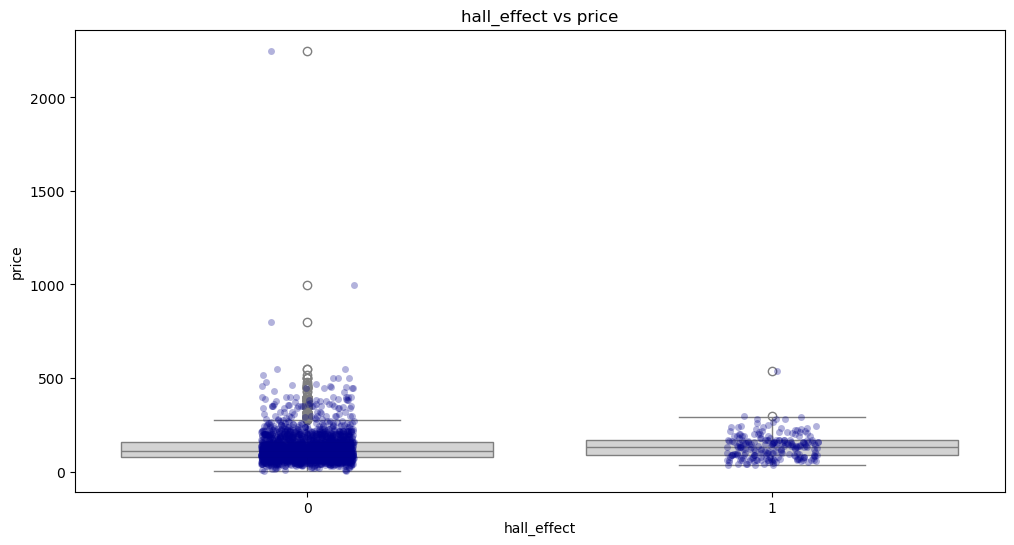

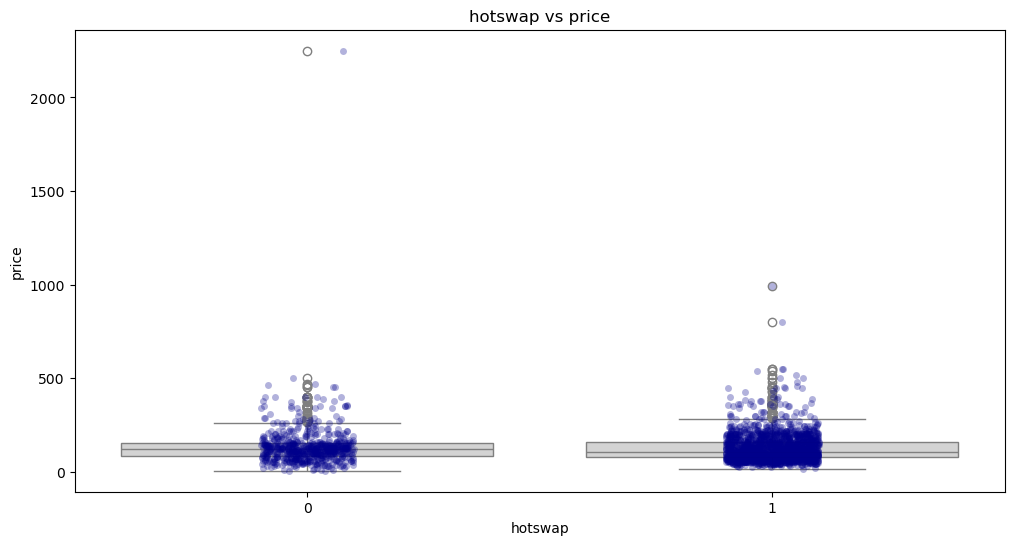

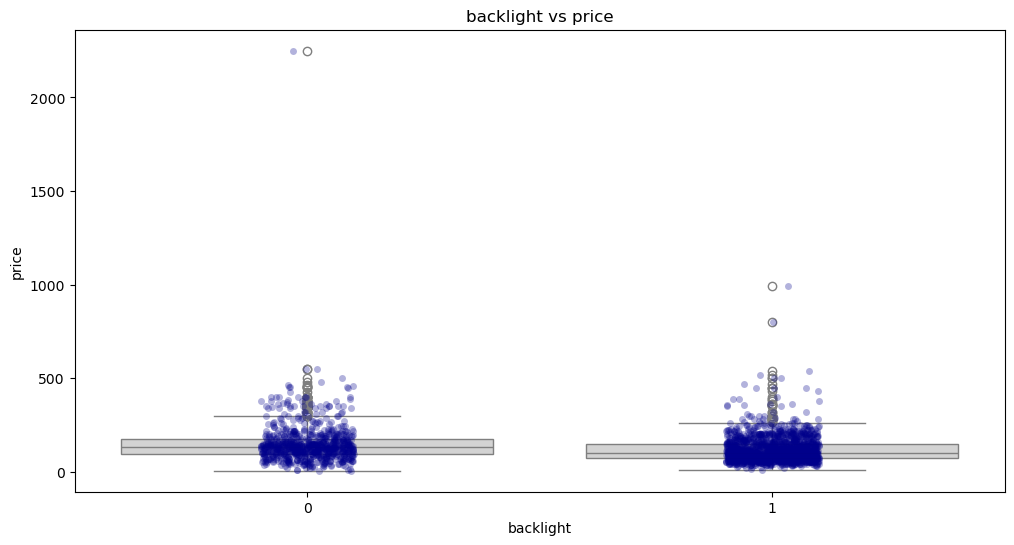

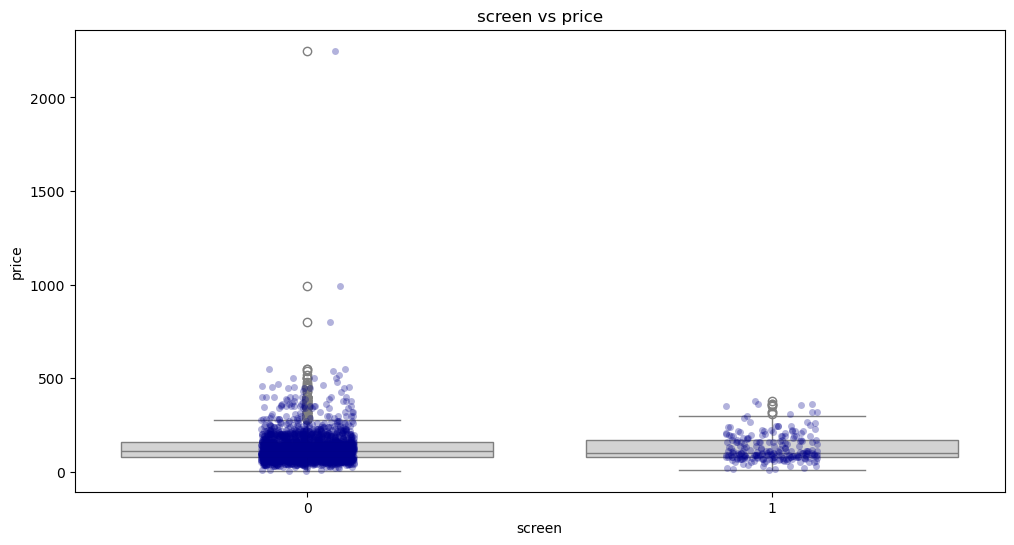

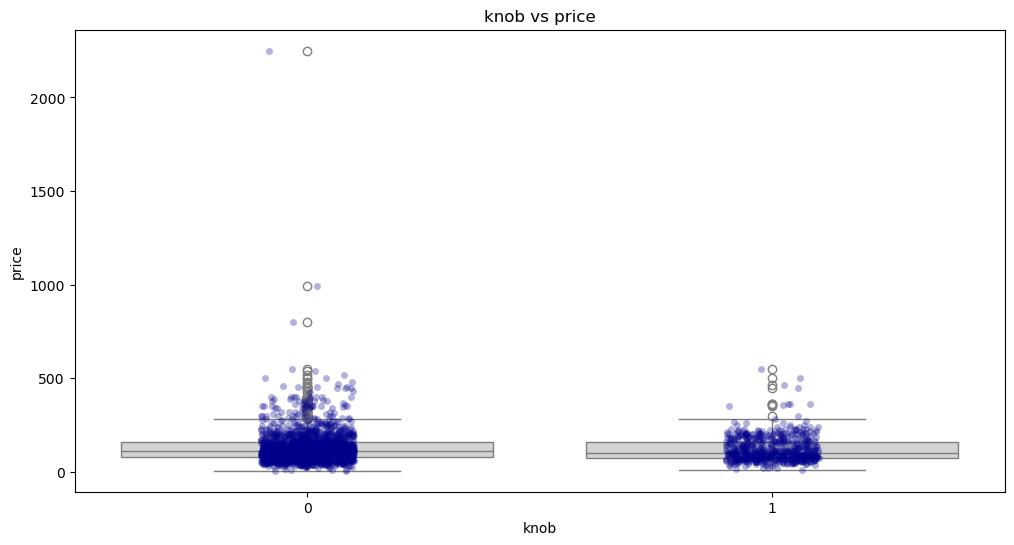

In [21]:
# binary features vs price
binary_features = ['hall_effect', 'hotswap', 'backlight', 'screen', 'knob']
for feature in binary_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=feature, y='price', color='lightgray')
    sns.stripplot(data=df, x=feature, y='price', color='darkblue', alpha=0.3, jitter=True)
    plt.title(f'{feature} vs price')
    plt.show()



### categorical cols

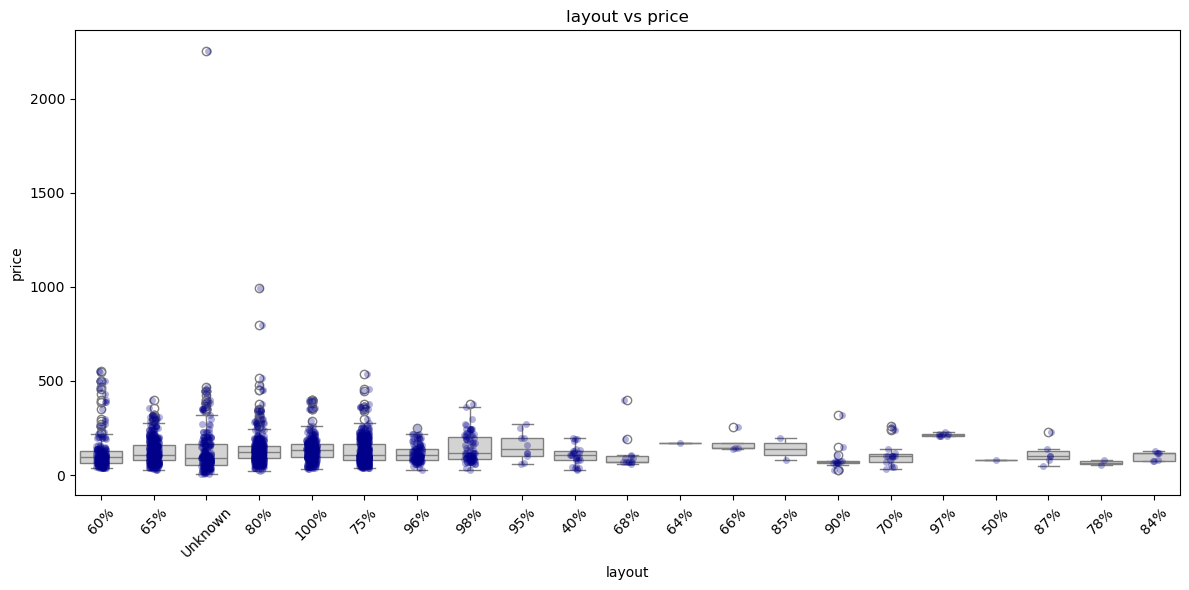

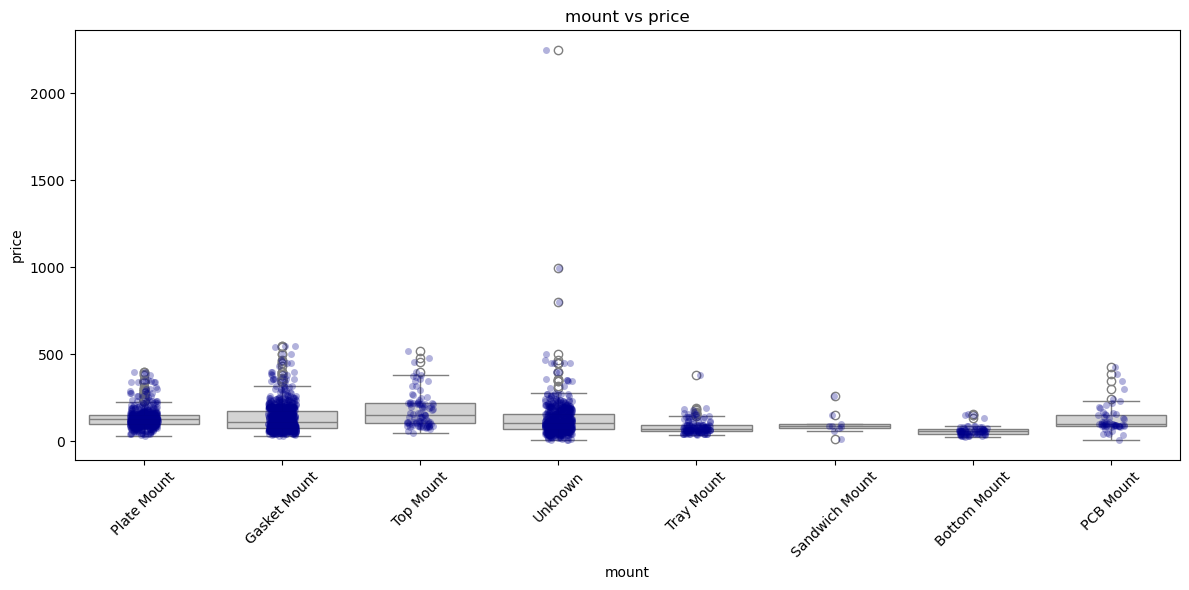

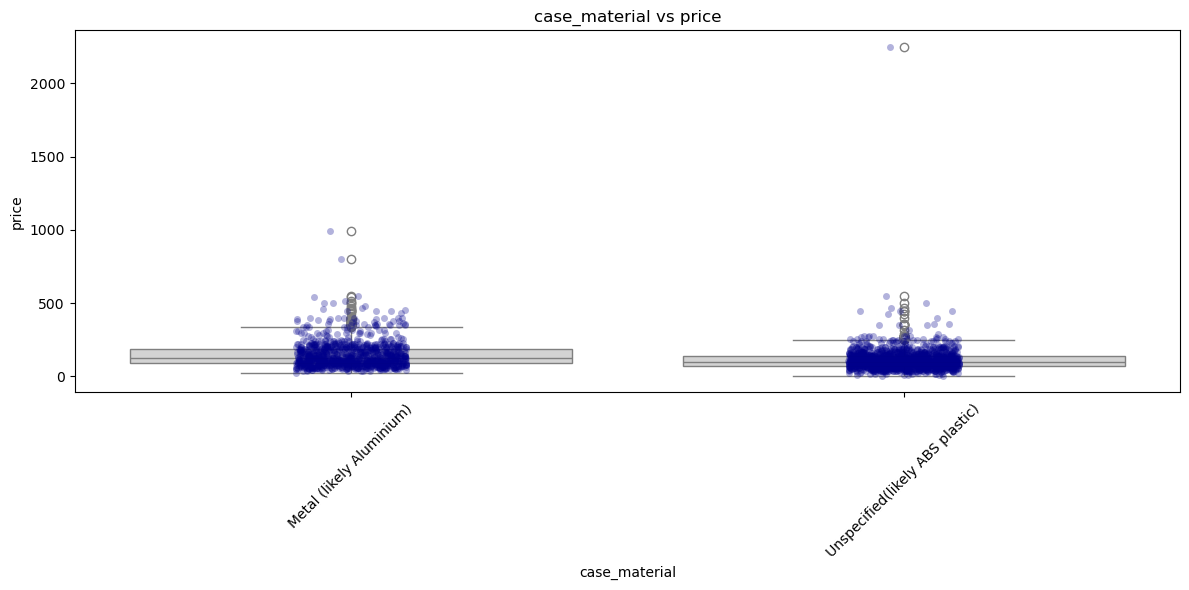

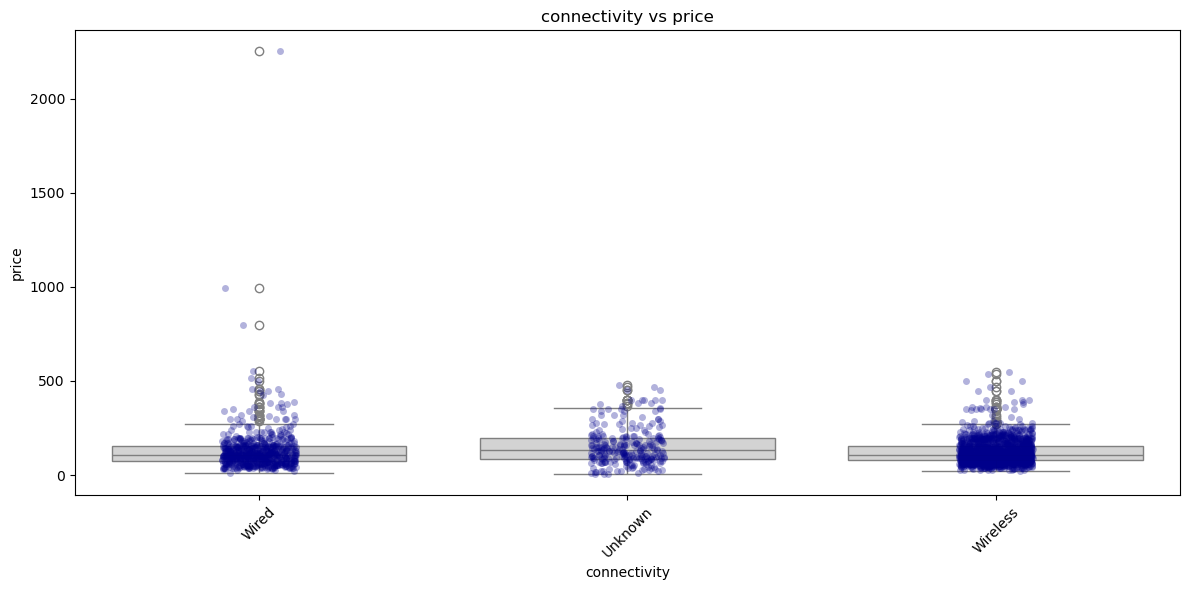

In [22]:
# categorical features vs price
categorical_features = ['layout', 'mount', 'case_material', 'connectivity']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=feature, y='price', color='lightgray')
    sns.stripplot(data=df, x=feature, y='price', color='darkblue', alpha=0.3, jitter=True)
    plt.title(f'{feature} vs price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## does brand category have an impact on price?

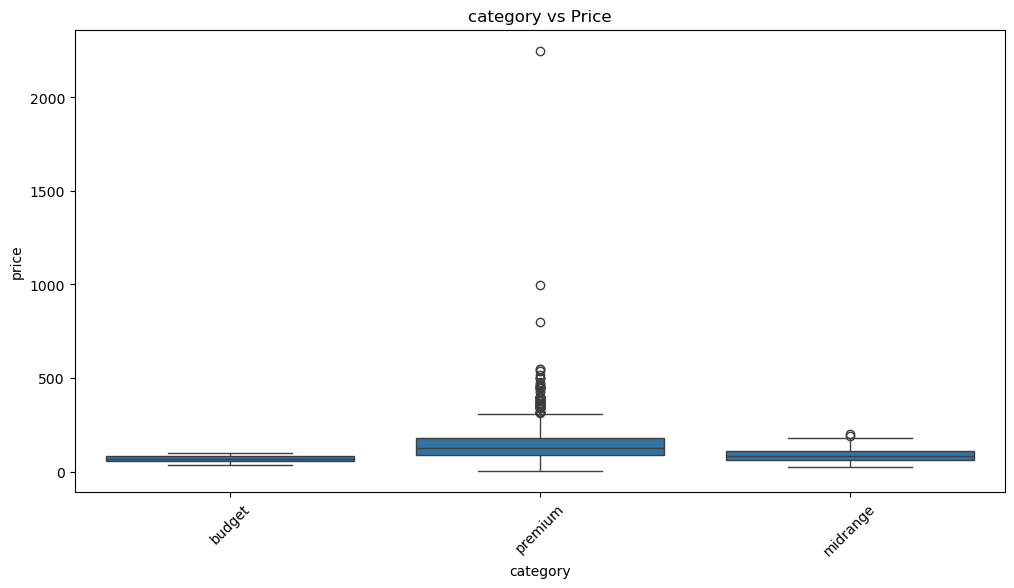

In [23]:
# does tier of brand have an impact on price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='price')
plt.title('category vs Price')
plt.xticks(rotation=45)
plt.show()

## are some features disproportionately present in certain price brackets?


<Figure size 1200x600 with 0 Axes>

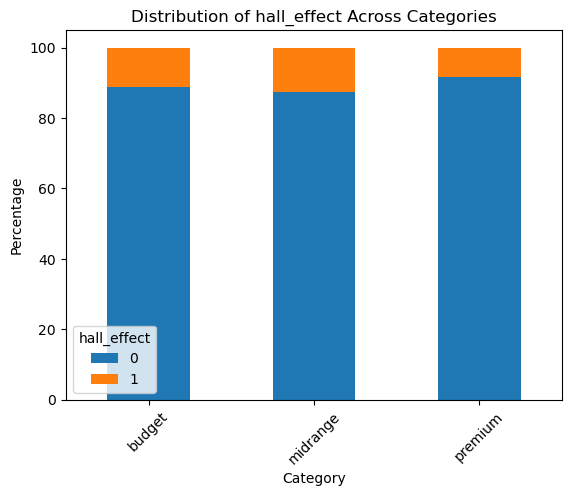

<Figure size 1200x600 with 0 Axes>

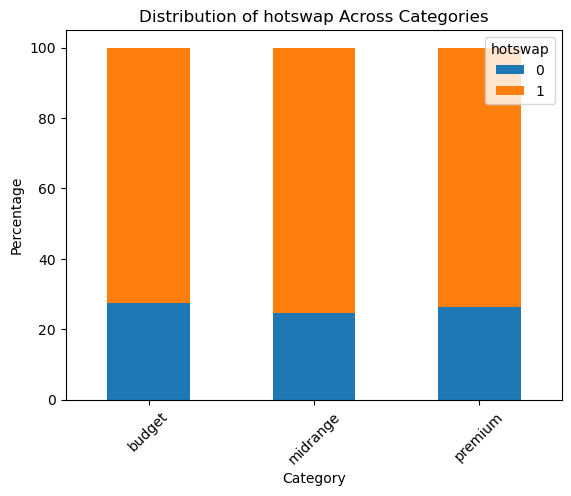

<Figure size 1200x600 with 0 Axes>

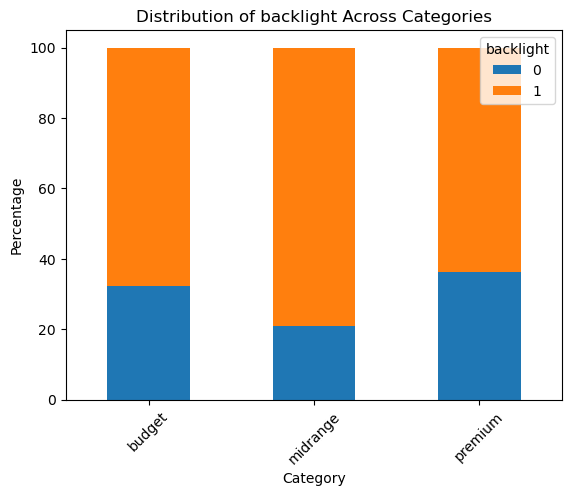

<Figure size 1200x600 with 0 Axes>

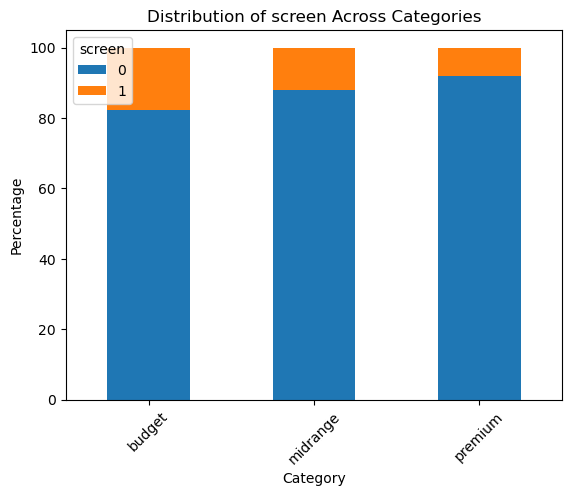

<Figure size 1200x600 with 0 Axes>

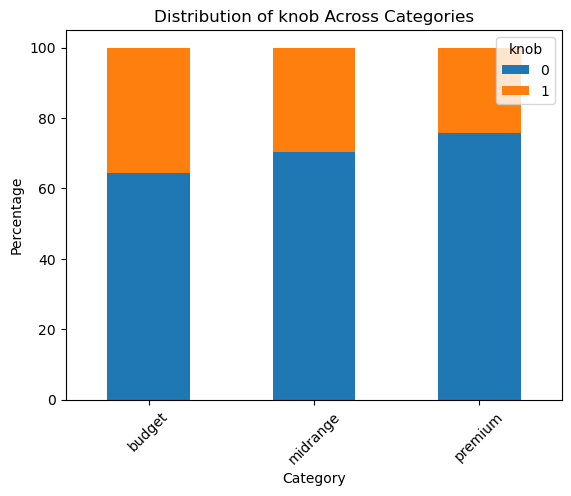

In [24]:
# binary features
binary_features = ['hall_effect', 'hotswap', 'backlight', 'screen', 'knob']
for feature in binary_features:
    plt.figure(figsize=(12, 6))
    feature_by_category = pd.crosstab(df['category'], df[feature], normalize='index') * 100
    feature_by_category.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {feature} Across Categories')
    plt.xlabel('Category')
    plt.ylabel('Percentage')
    plt.legend(title=feature)
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1200x600 with 0 Axes>

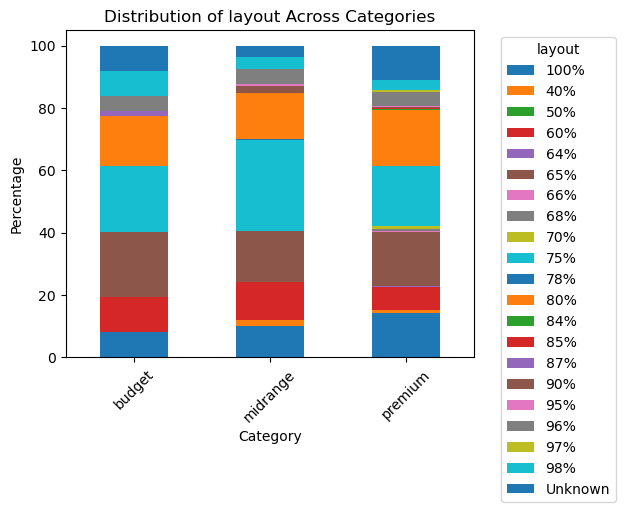

<Figure size 1200x600 with 0 Axes>

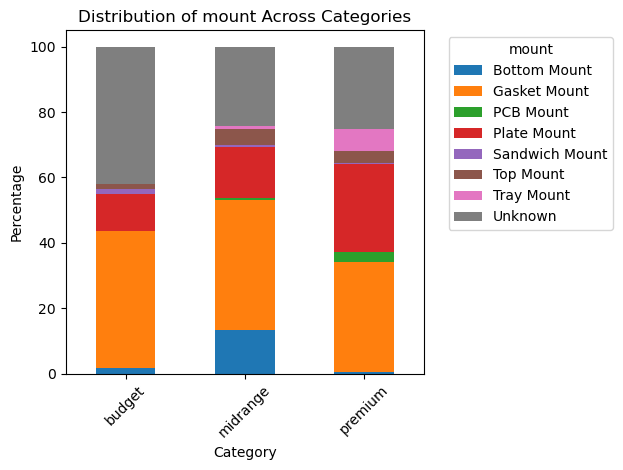

<Figure size 1200x600 with 0 Axes>

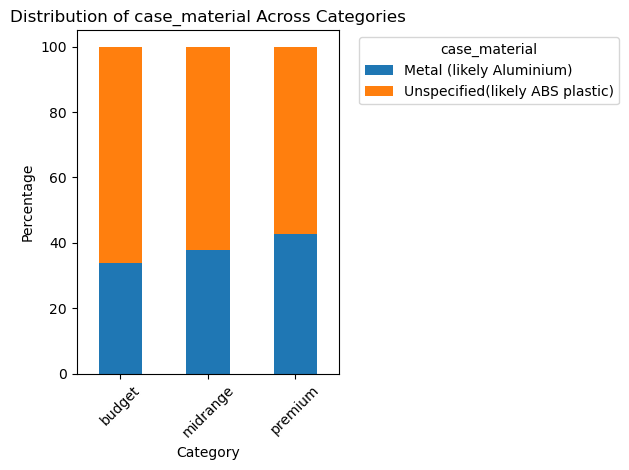

<Figure size 1200x600 with 0 Axes>

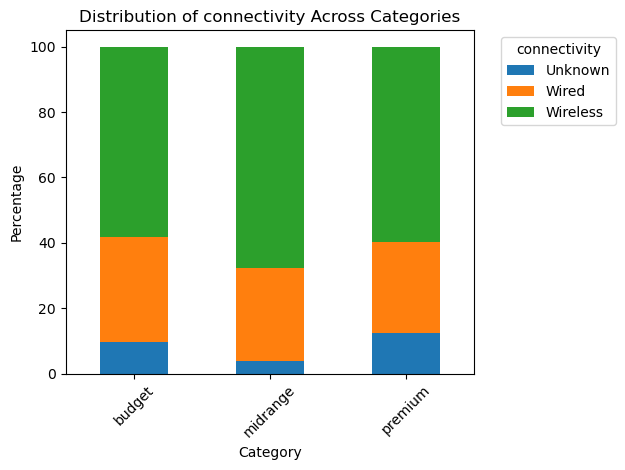

In [25]:
# categorical features
categorical_features = ['layout', 'mount', 'case_material', 'connectivity']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    feature_by_category = pd.crosstab(df['category'], df[feature], normalize='index') * 100
    feature_by_category.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {feature} Across Categories')
    plt.xlabel('Category')
    plt.ylabel('Percentage')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

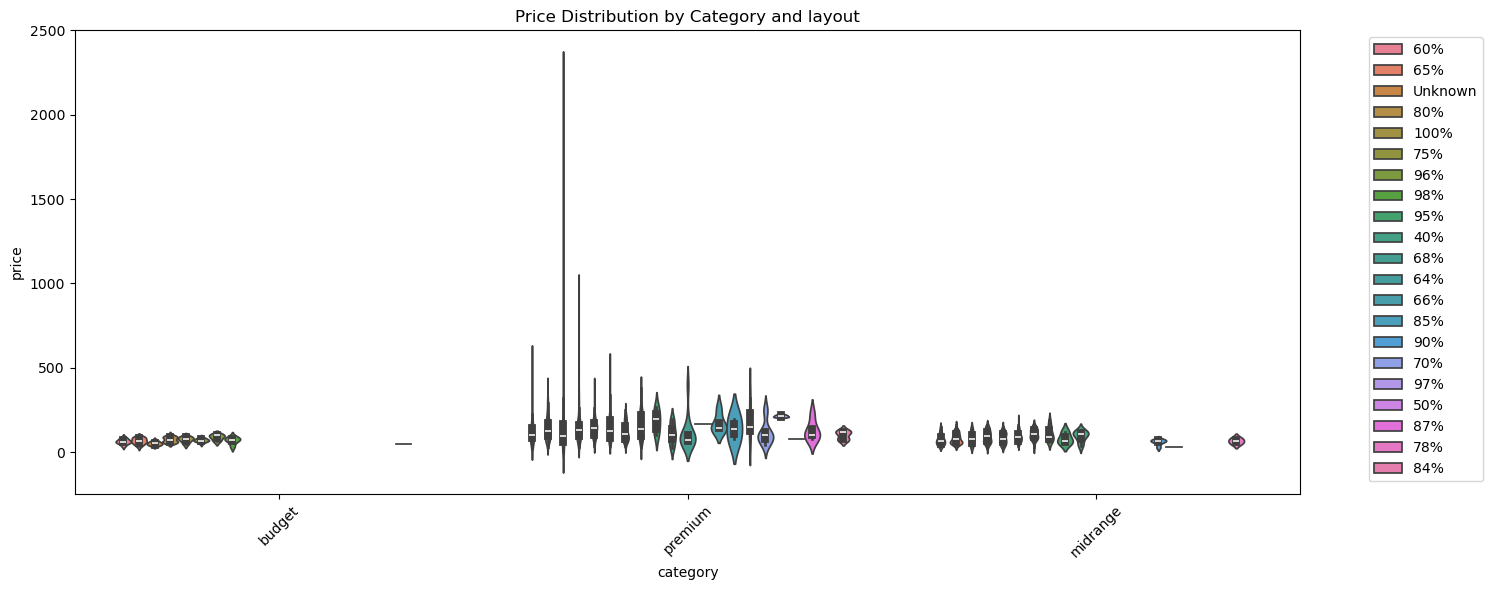

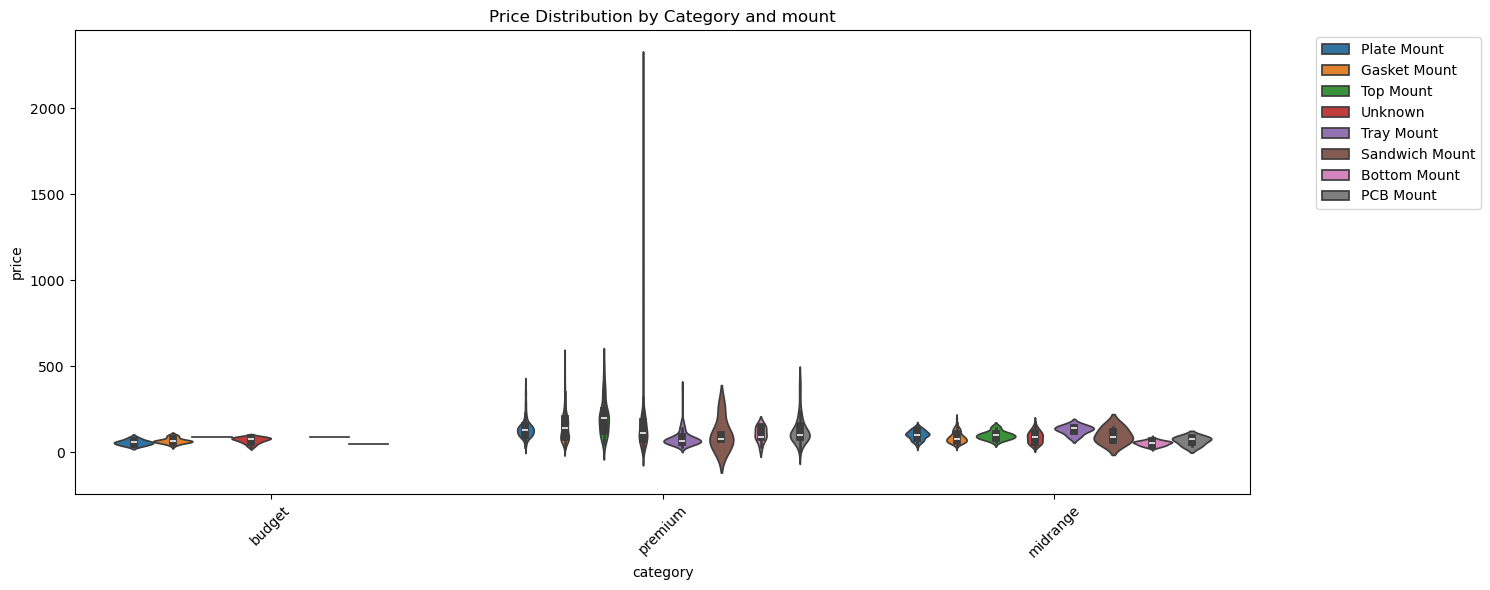

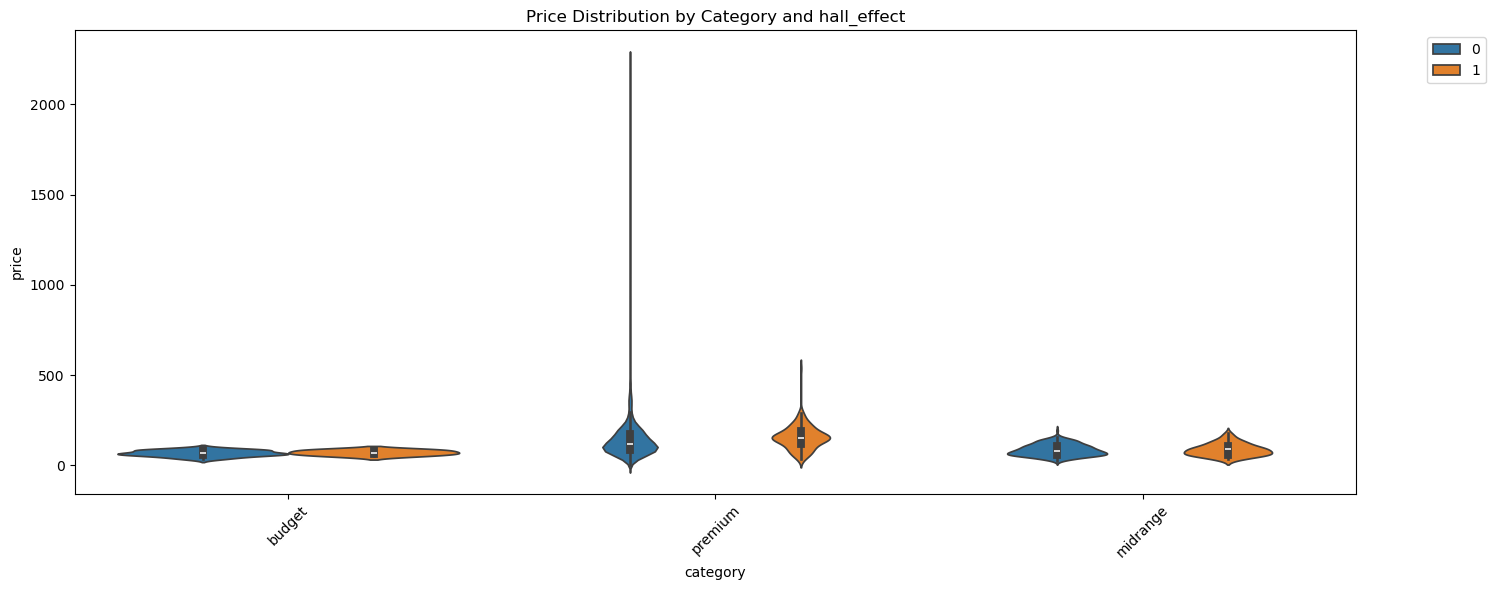

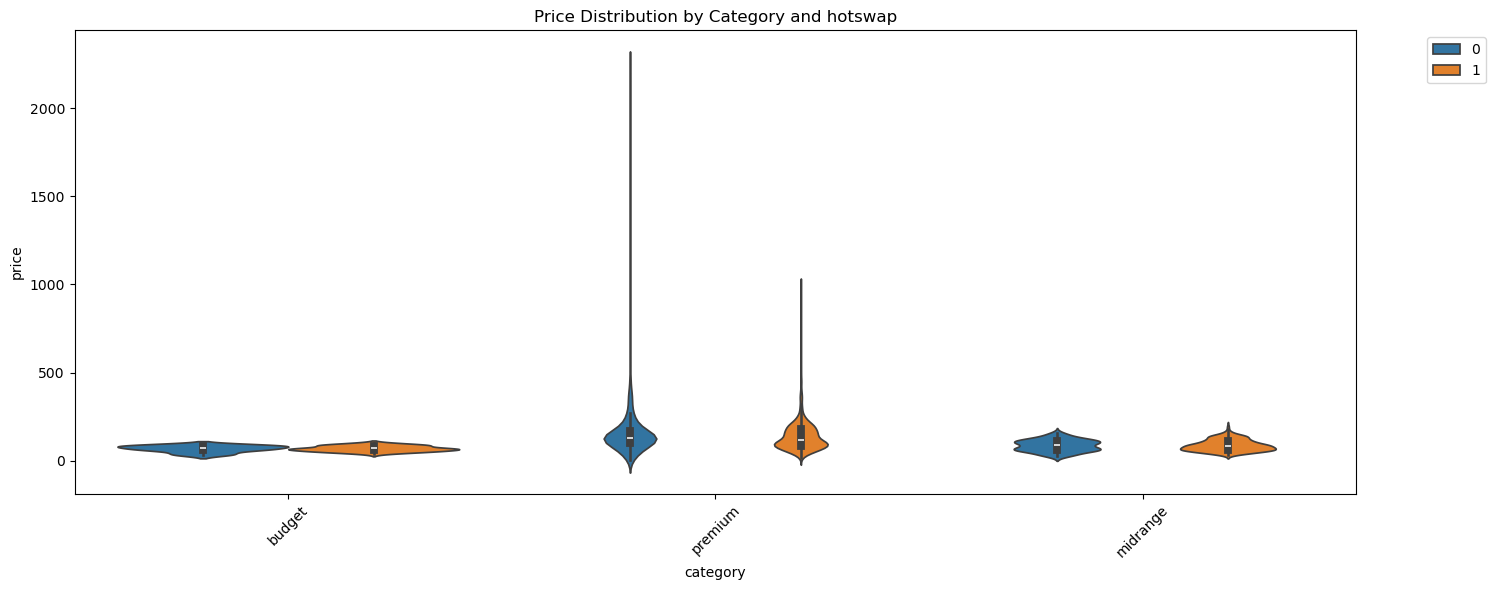

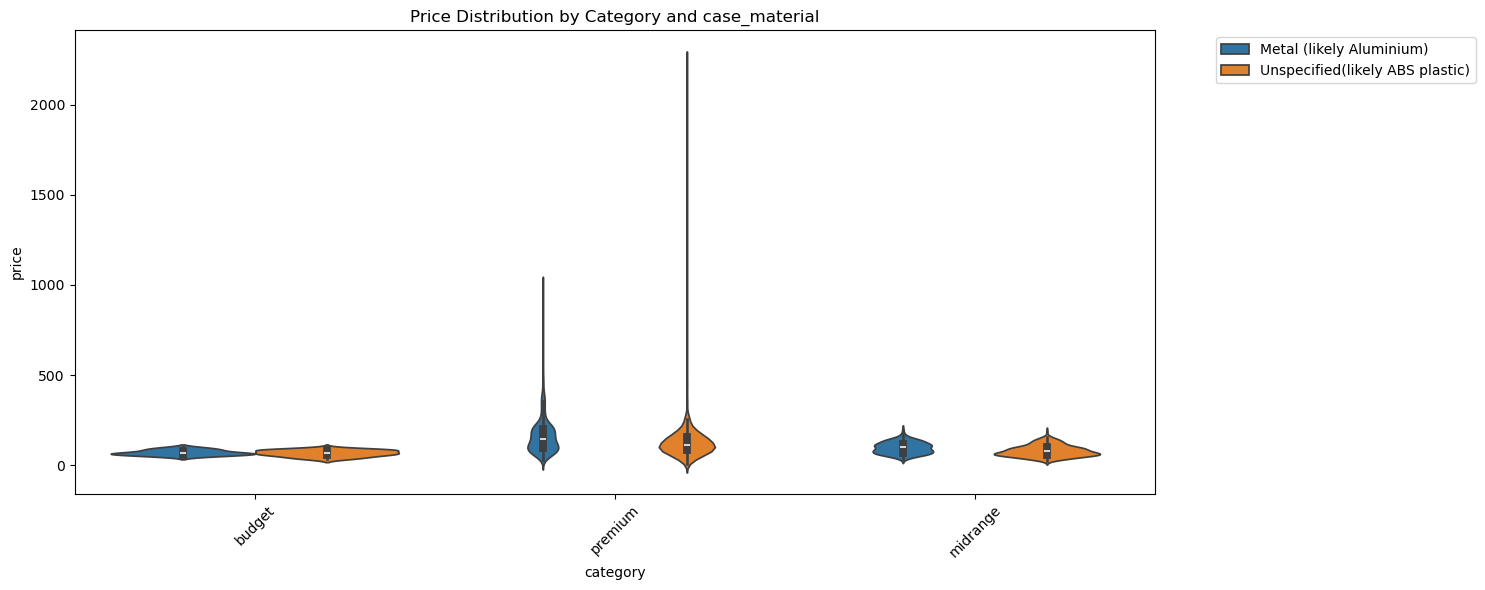

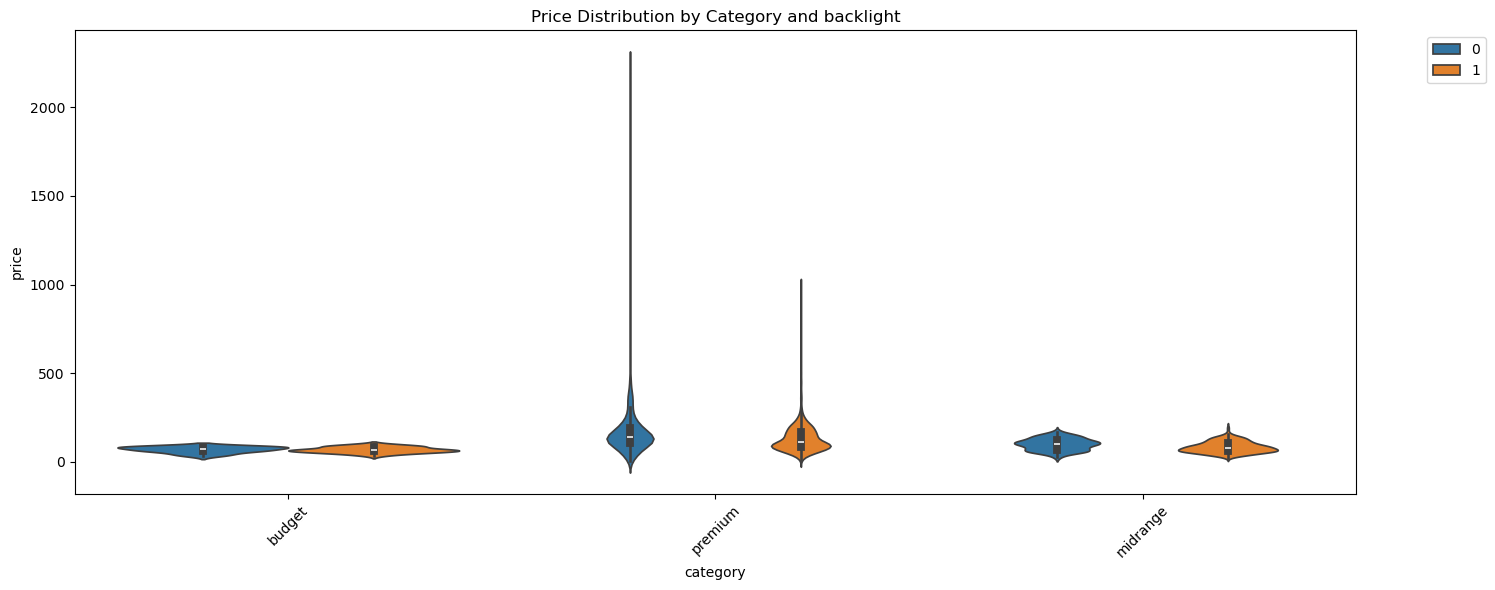

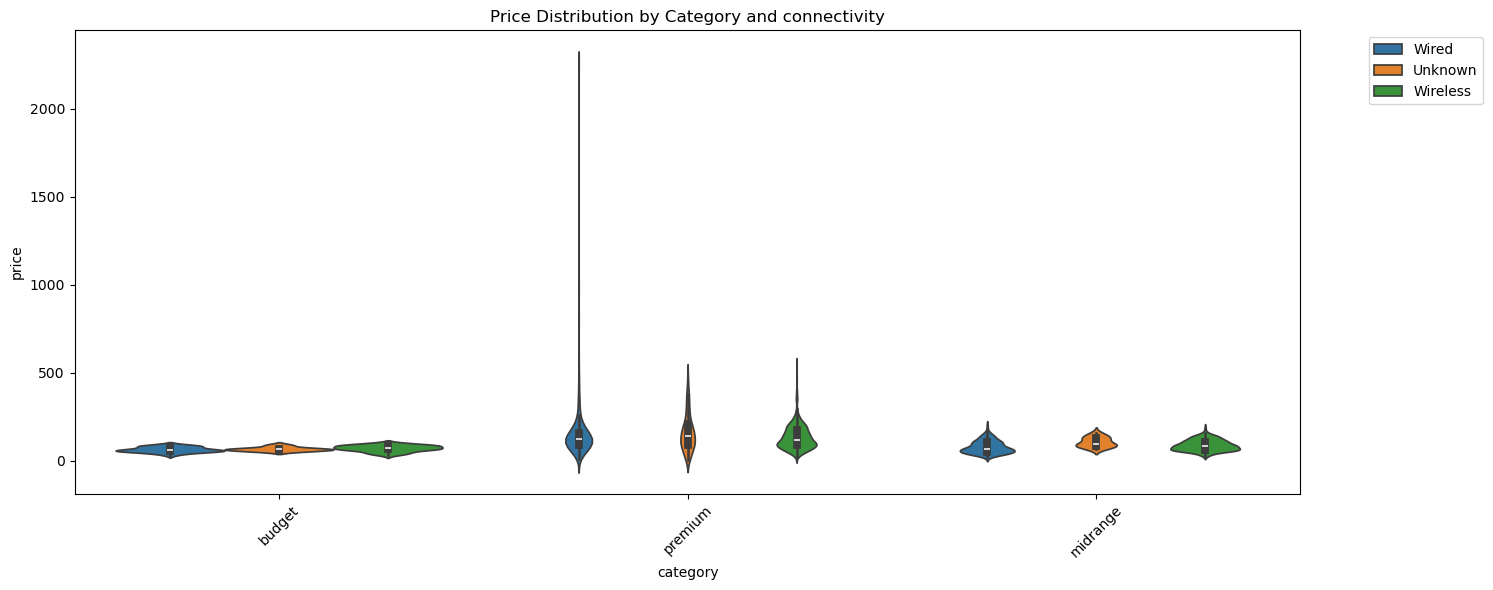

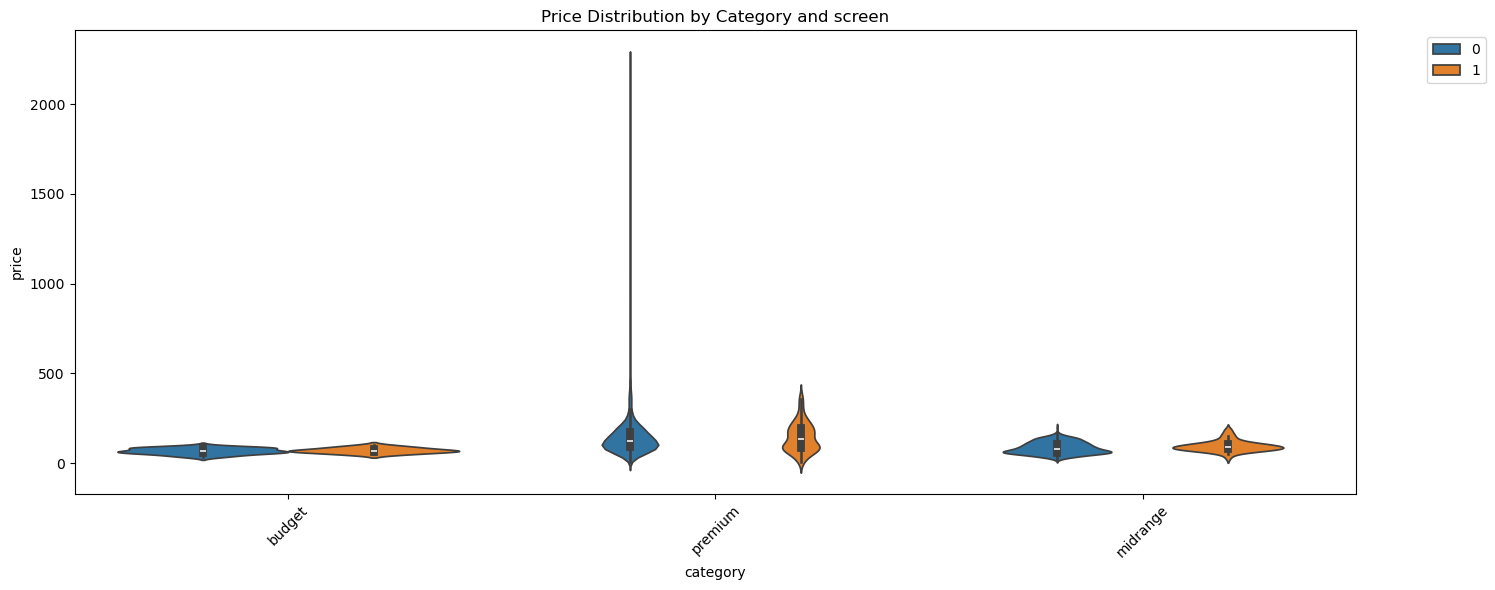

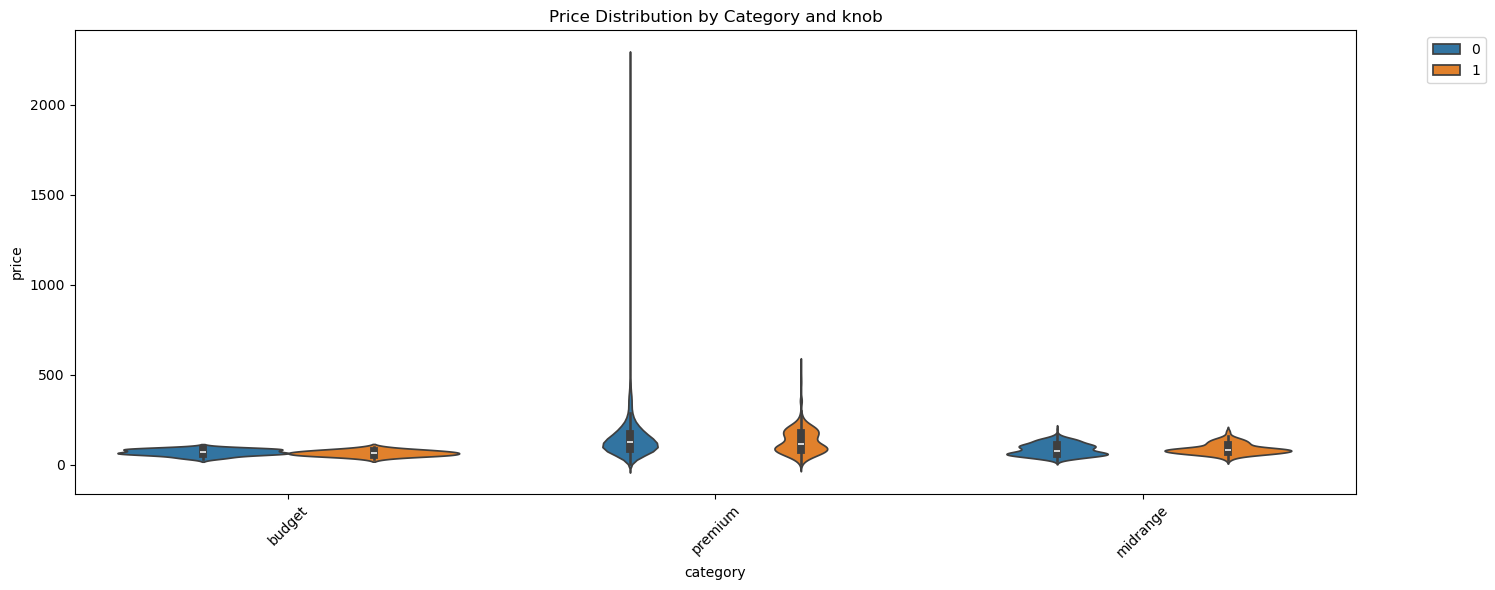

In [26]:
features = ['layout', 'mount', 'hall_effect', 'hotswap', 'case_material', 'backlight', 'connectivity', 'screen', 'knob']

for feature in features:
    plt.figure(figsize=(15, 6))
    sns.violinplot(data=df, x='category', y='price', hue=feature)
    plt.title(f'Price Distribution by Category and {feature}')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Are any features strongly correlated?
## Are there interactions? (e.g., Premium + Wireless = Higher Price?)



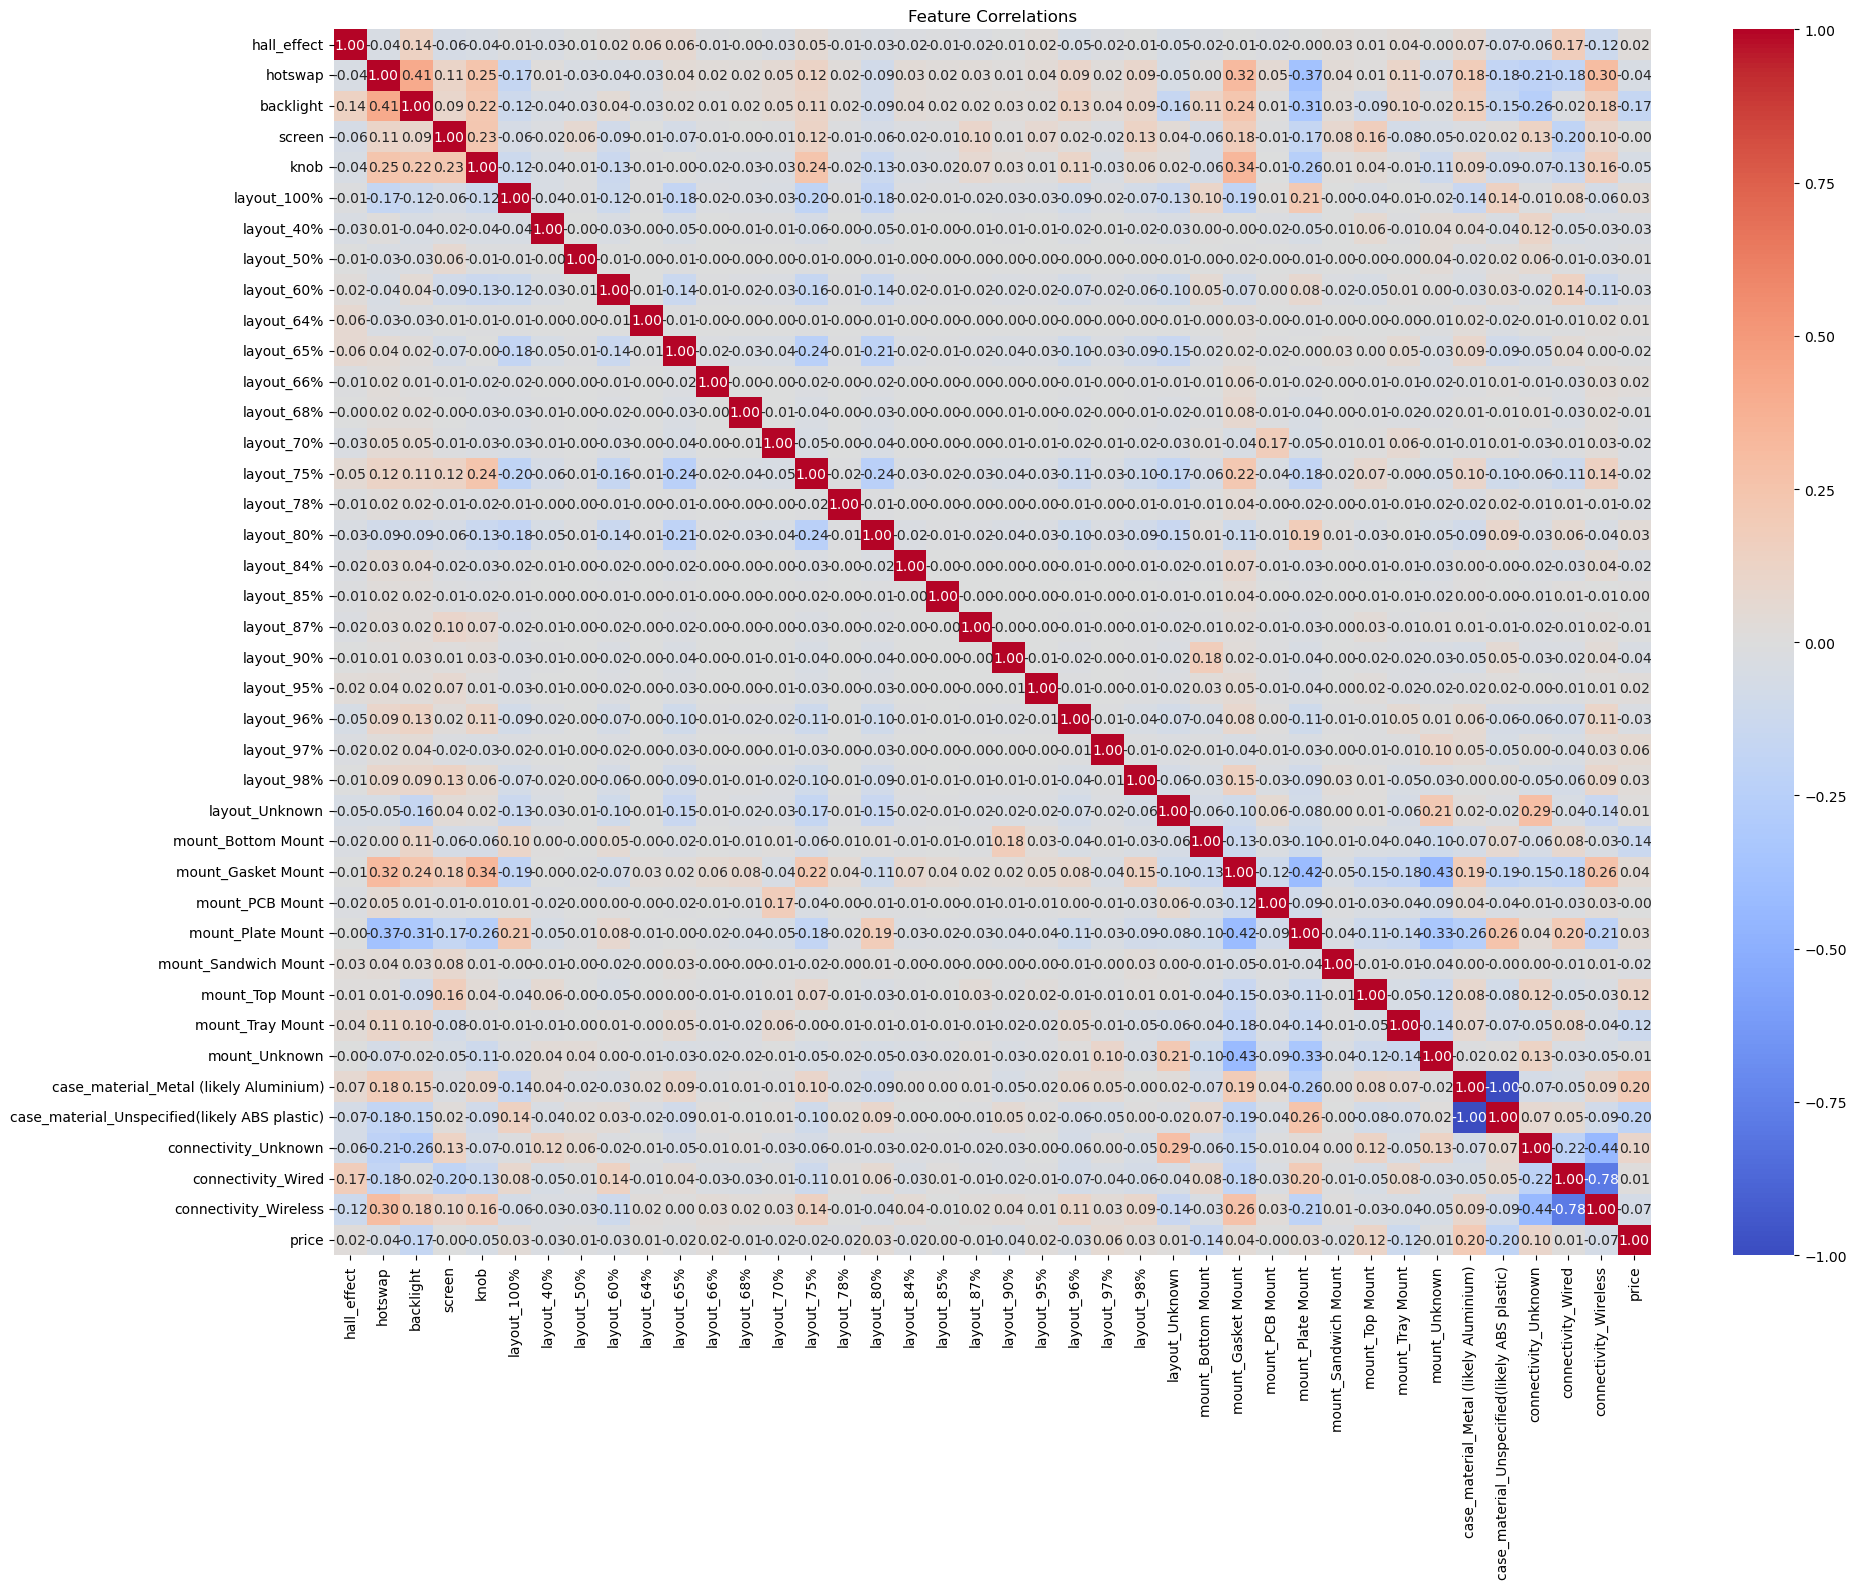

In [27]:
#!GPT CODE

# First convert categorical variables to dummy variables (one-hot encoding)
# Get dummies for categorical features
categorical_features = ['layout', 'mount', 'case_material', 'connectivity']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Include binary features and price
binary_features = ['hall_effect', 'hotswap', 'backlight', 'screen', 'knob']
features_for_correlation = binary_features + [col for col in df_encoded.columns if any(feat in col for feat in categorical_features)] + ['price']

# Create correlation matrix
correlation_matrix = df_encoded[features_for_correlation].corr()

# Create heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlations')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Doing EDA on data with outliers removed

In [28]:
# pip install outlier-cleaner
from outlier_cleaner import OutlierCleaner


In [ ]:
# clean outliers

cleaner = OutlierCleaner(df)
df2, info = cleaner.clean_columns(
    method='auto',
    show_progress=True
)

Cleaning columns: 100%|██████████| 6/6 [00:00<00:00, 615.84it/s]

## which features impact price?

### binary cols

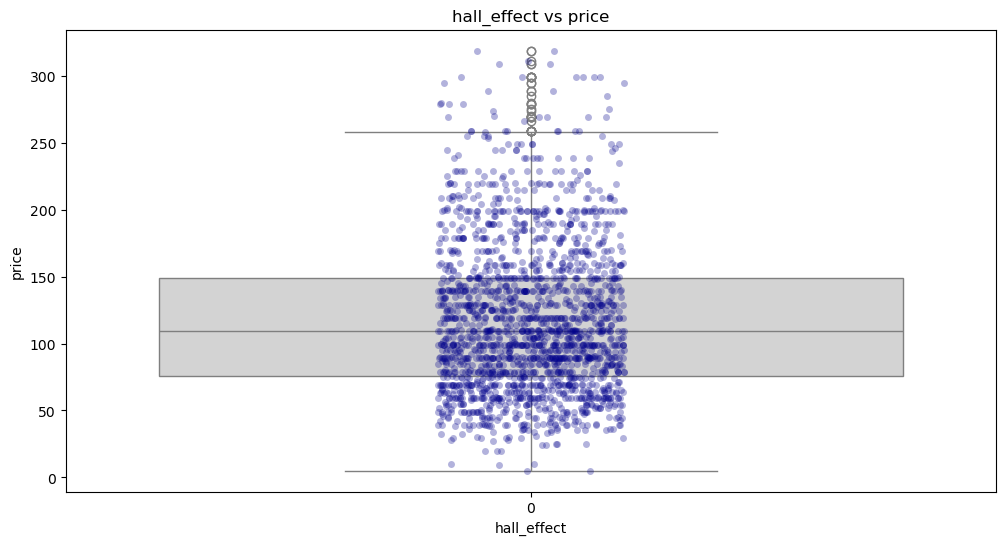

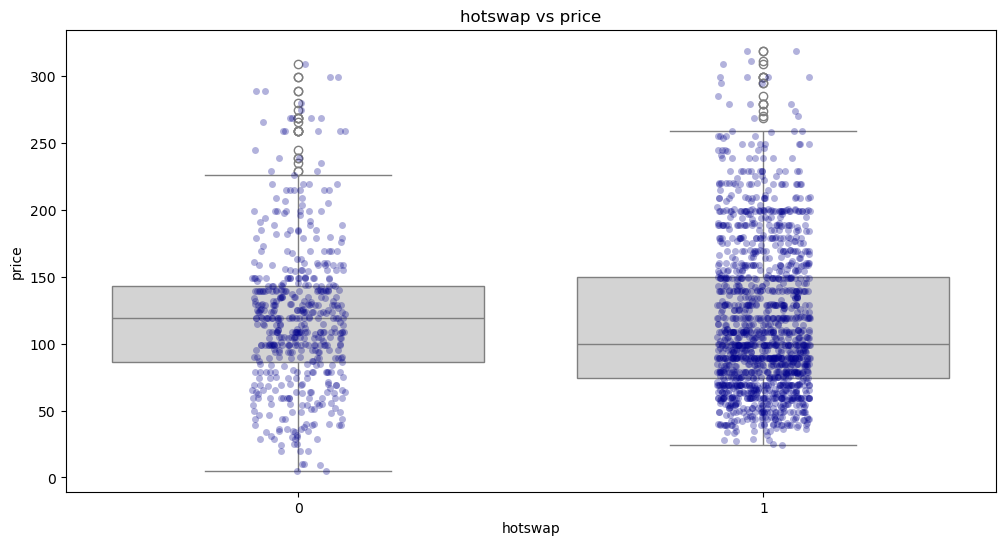

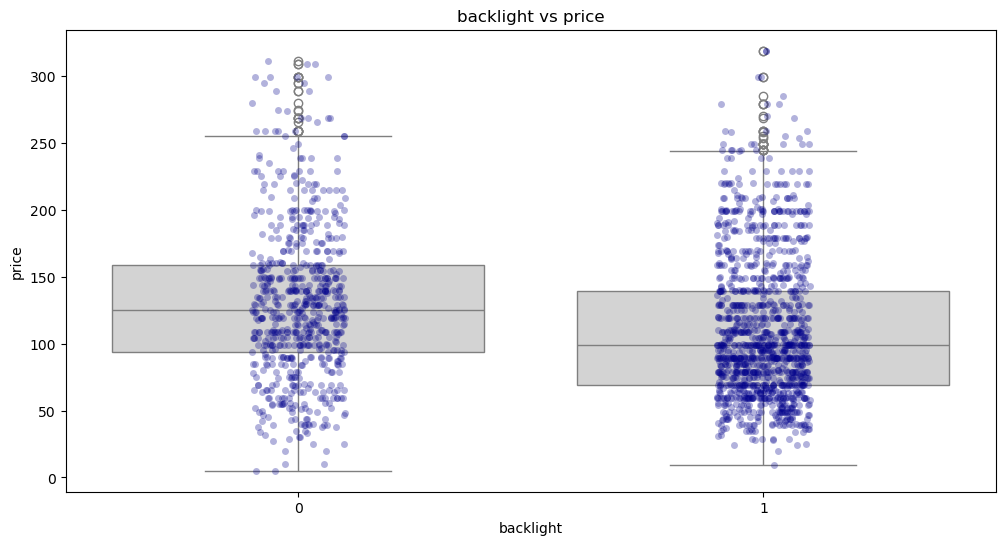

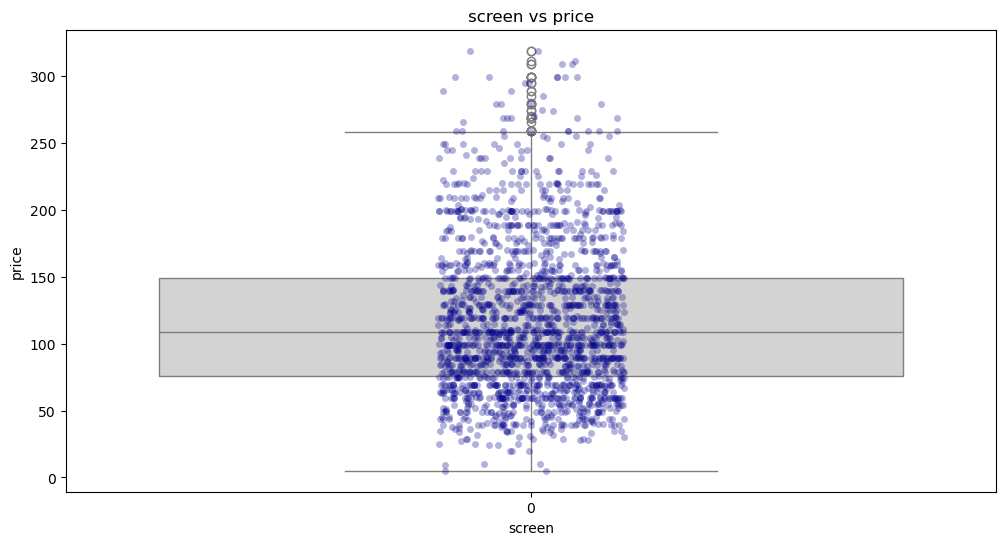

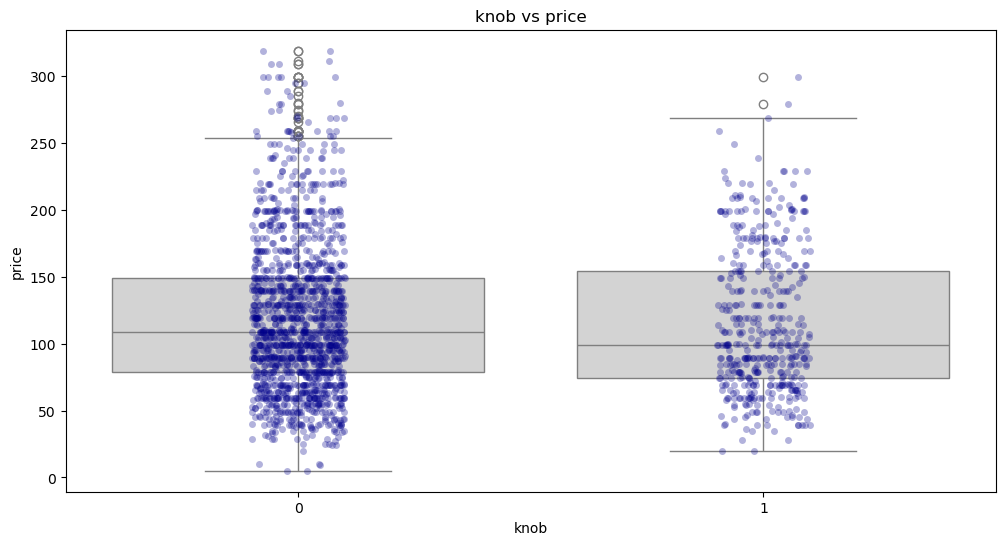

In [30]:
# binary features vs price
binary_features = ['hall_effect', 'hotswap', 'backlight', 'screen', 'knob']
for feature in binary_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df2, x=feature, y='price', color='lightgray')
    sns.stripplot(data=df2, x=feature, y='price', color='darkblue', alpha=0.3, jitter=True)
    plt.title(f'{feature} vs price')
    plt.show()



### categorical cols

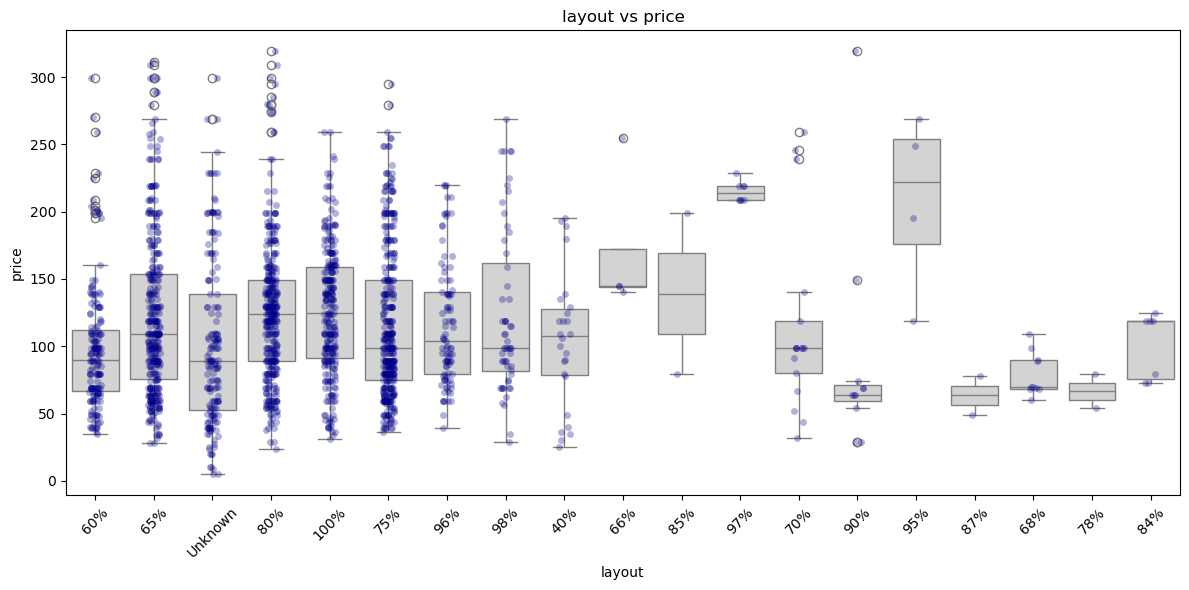

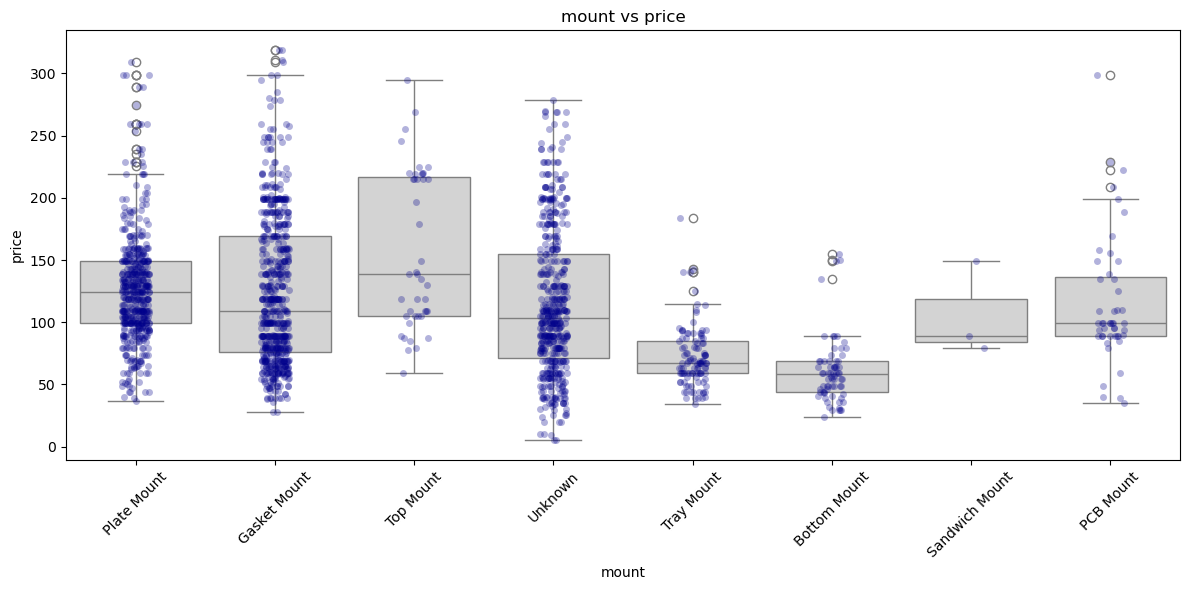

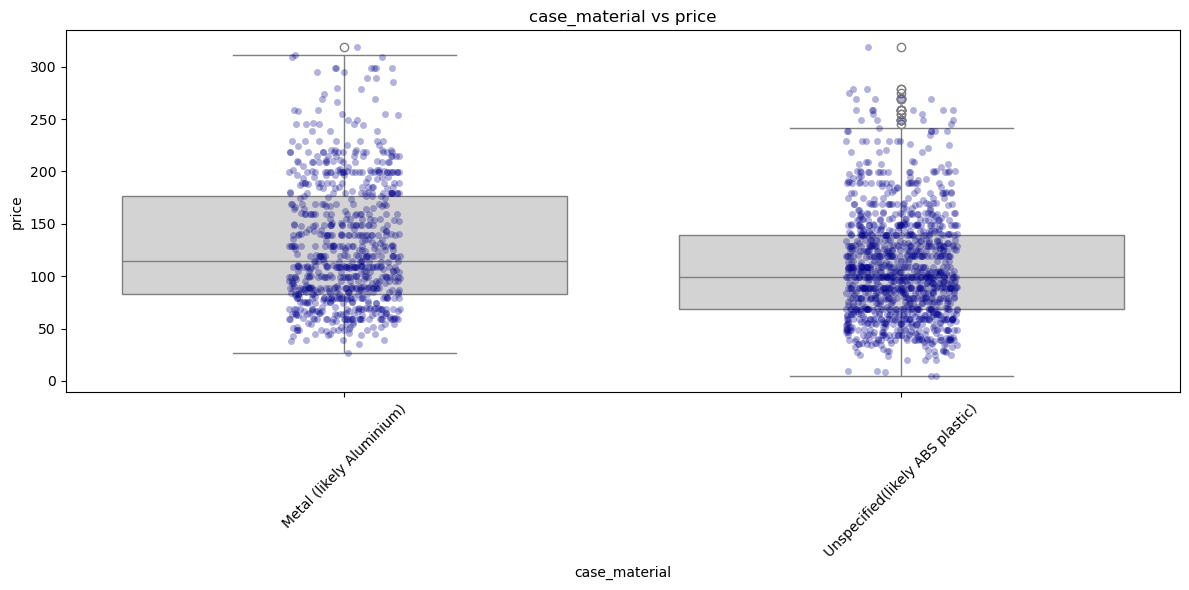

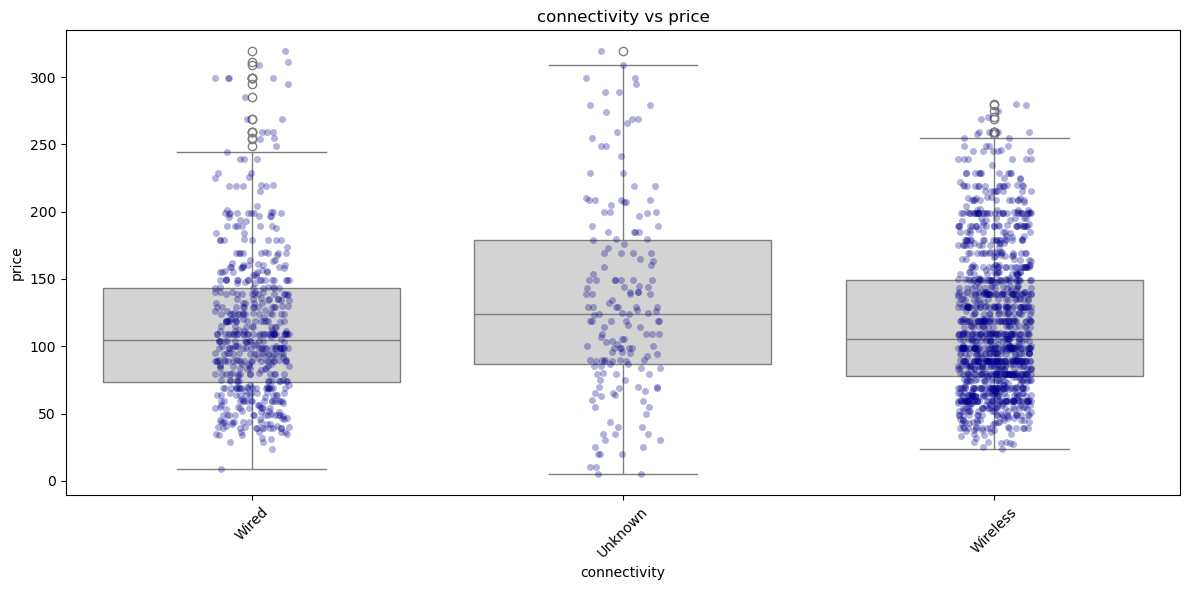

In [31]:
# categorical features vs price
categorical_features = ['layout', 'mount', 'case_material', 'connectivity']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df2, x=feature, y='price', color='lightgray')
    sns.stripplot(data=df2, x=feature, y='price', color='darkblue', alpha=0.3, jitter=True)
    plt.title(f'{feature} vs price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## does brand category have an impact on price?

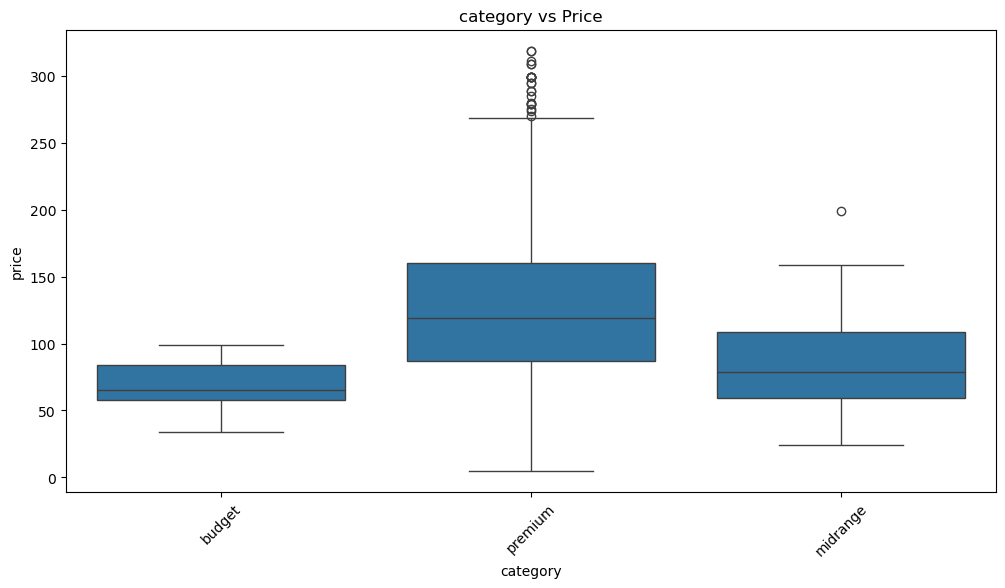

In [32]:
# does tier of brand have an impact on price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='category', y='price')
plt.title('category vs Price')
plt.xticks(rotation=45)
plt.show()

## are some features disproportionately present in certain price brackets?


<Figure size 1200x600 with 0 Axes>

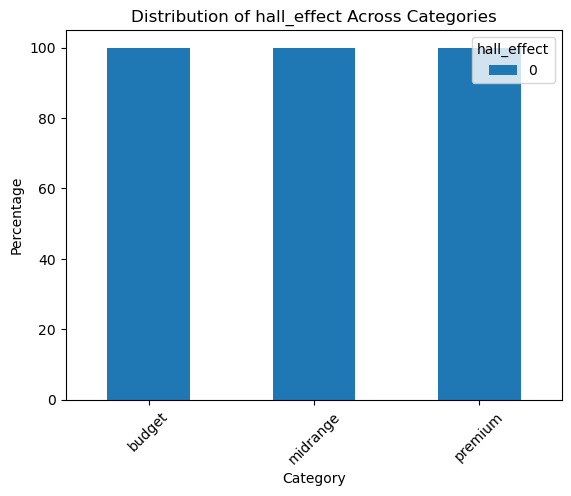

<Figure size 1200x600 with 0 Axes>

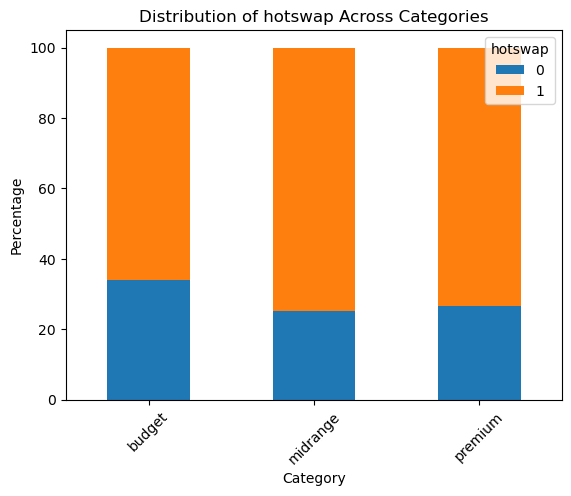

<Figure size 1200x600 with 0 Axes>

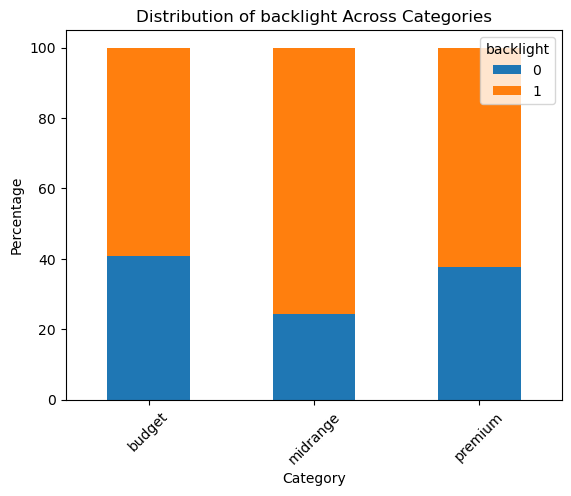

<Figure size 1200x600 with 0 Axes>

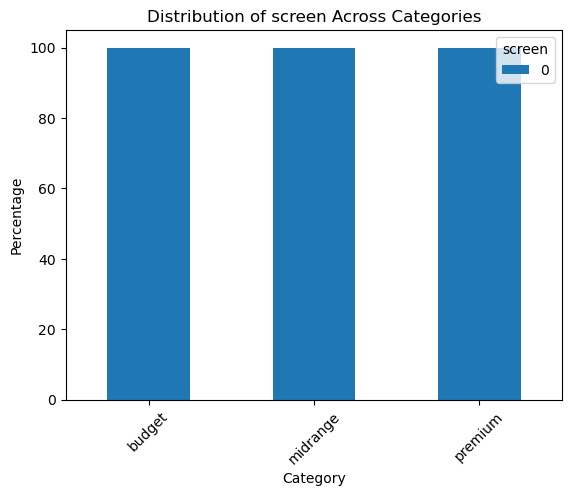

<Figure size 1200x600 with 0 Axes>

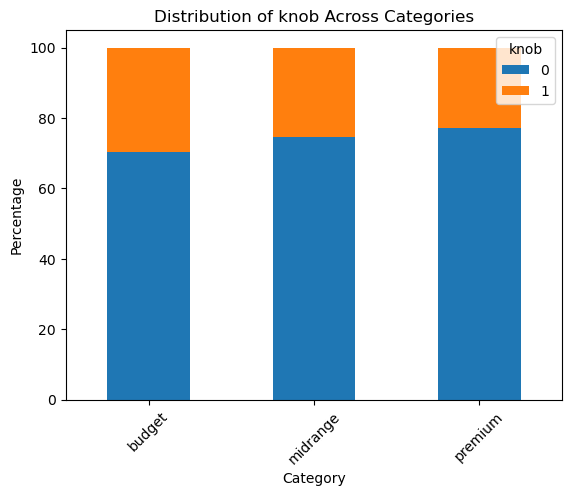

In [33]:
# binary features
binary_features = ['hall_effect', 'hotswap', 'backlight', 'screen', 'knob']
for feature in binary_features:
    plt.figure(figsize=(12, 6))
    feature_by_category = pd.crosstab(df2['category'], df2[feature], normalize='index') * 100
    feature_by_category.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {feature} Across Categories')
    plt.xlabel('Category')
    plt.ylabel('Percentage')
    plt.legend(title=feature)
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1200x600 with 0 Axes>

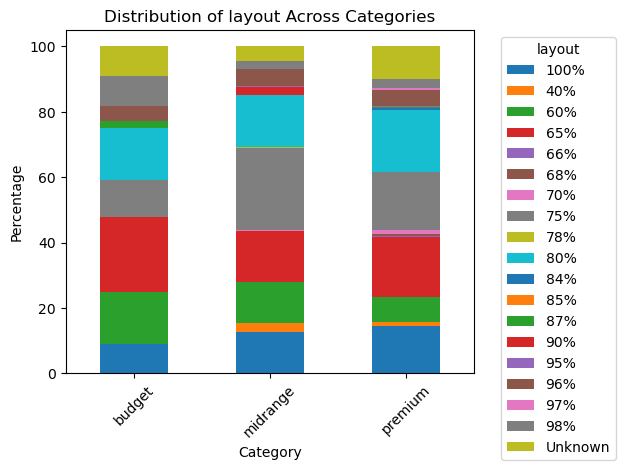

<Figure size 1200x600 with 0 Axes>

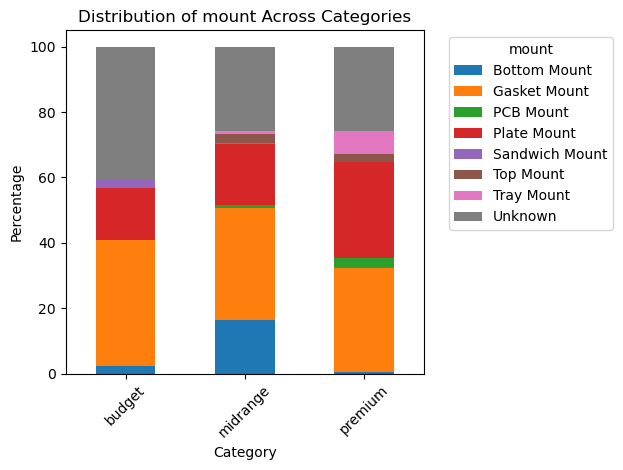

<Figure size 1200x600 with 0 Axes>

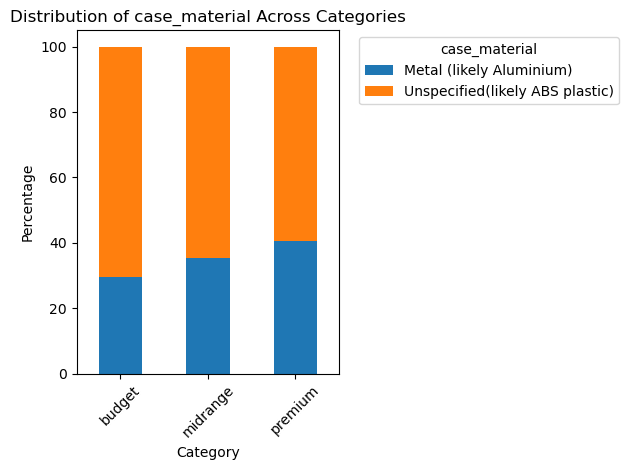

<Figure size 1200x600 with 0 Axes>

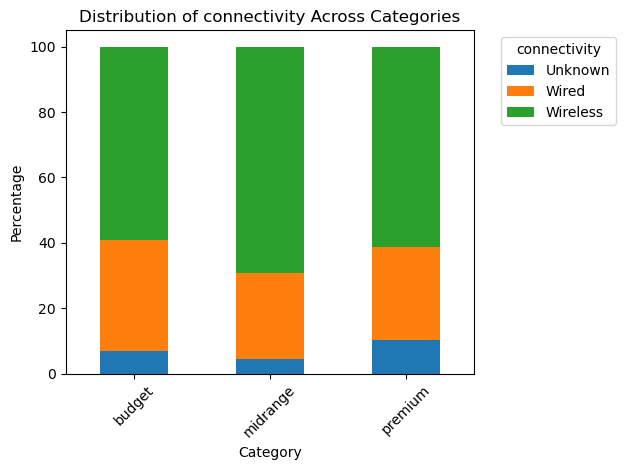

In [34]:
# categorical features
categorical_features = ['layout', 'mount', 'case_material', 'connectivity']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    feature_by_category = pd.crosstab(df2['category'], df2[feature], normalize='index') * 100
    feature_by_category.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {feature} Across Categories')
    plt.xlabel('Category')
    plt.ylabel('Percentage')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

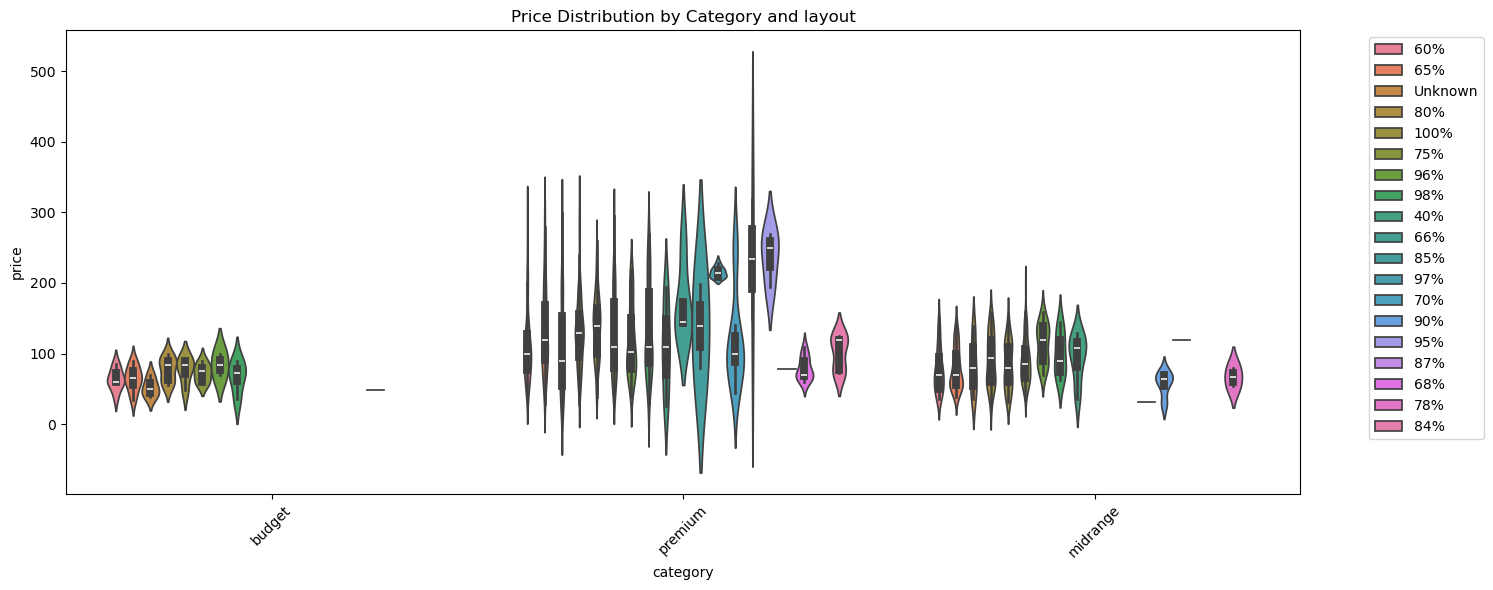

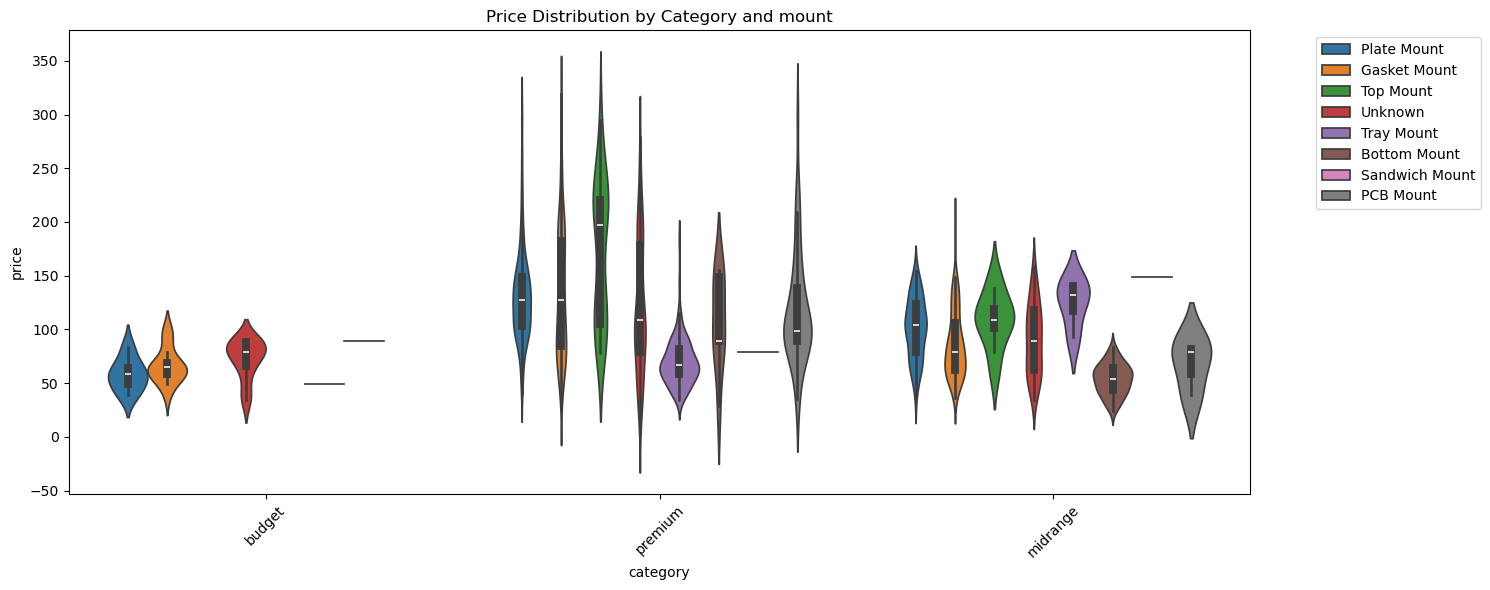

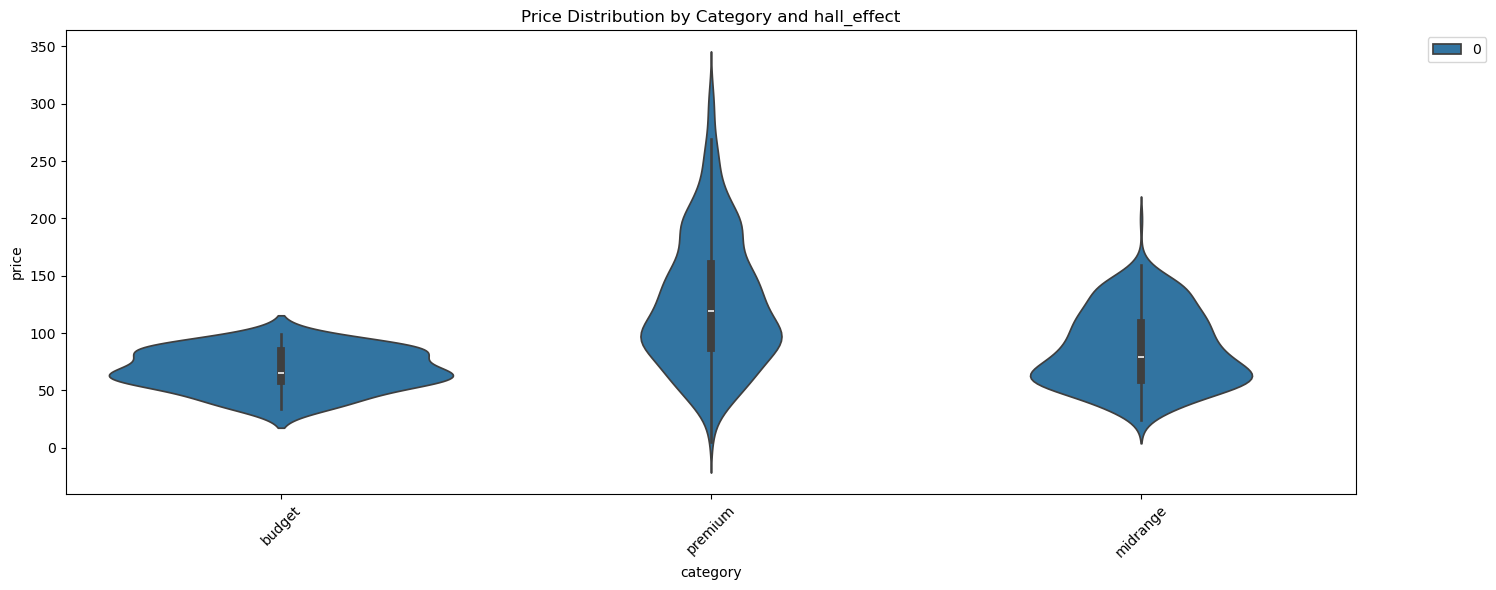

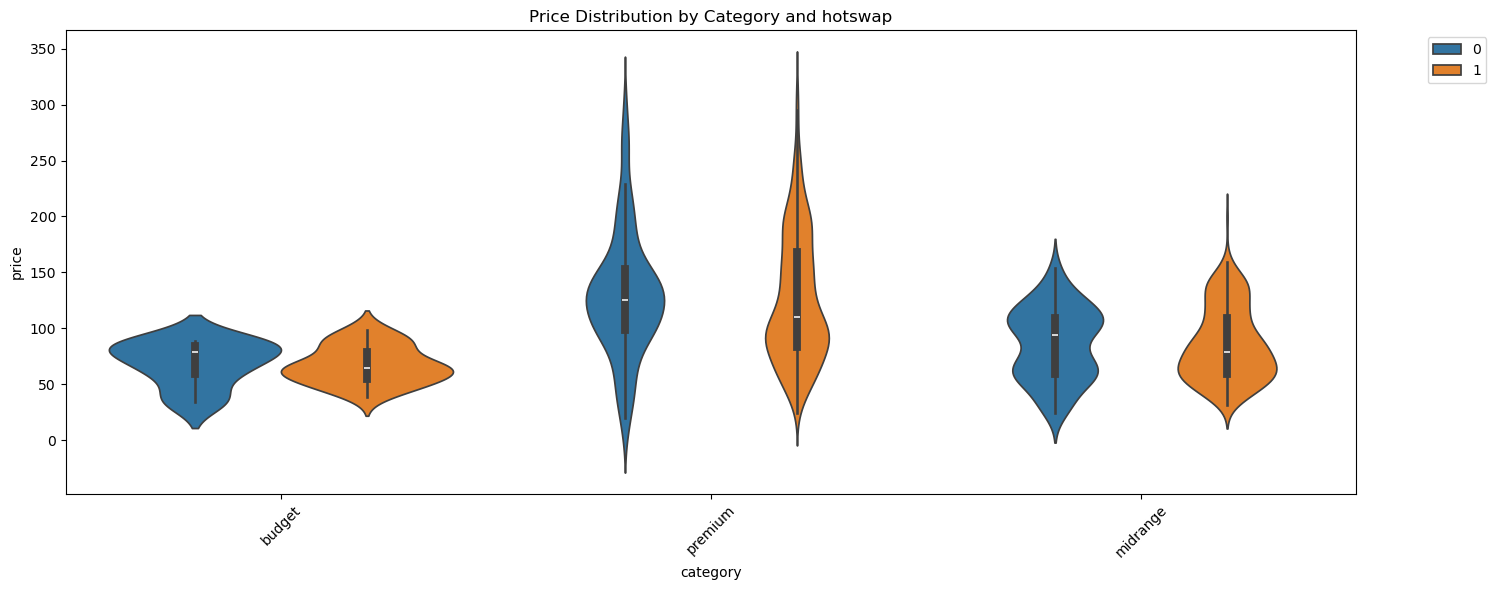

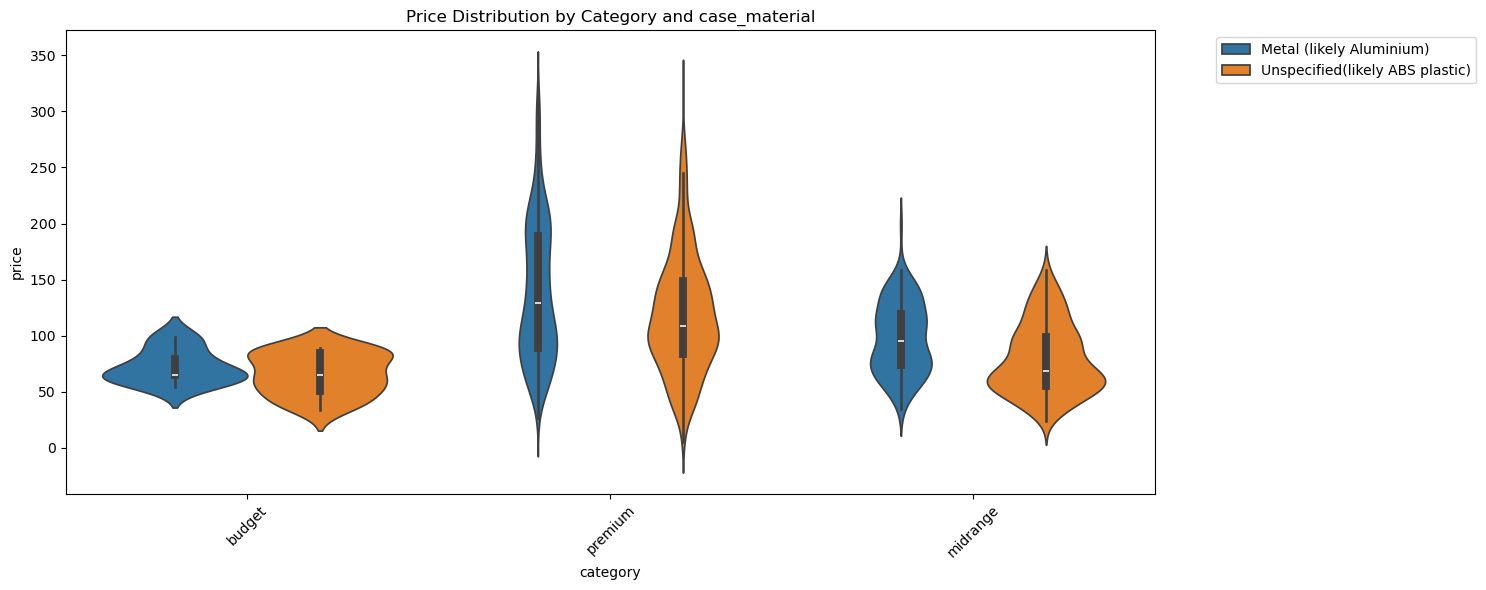

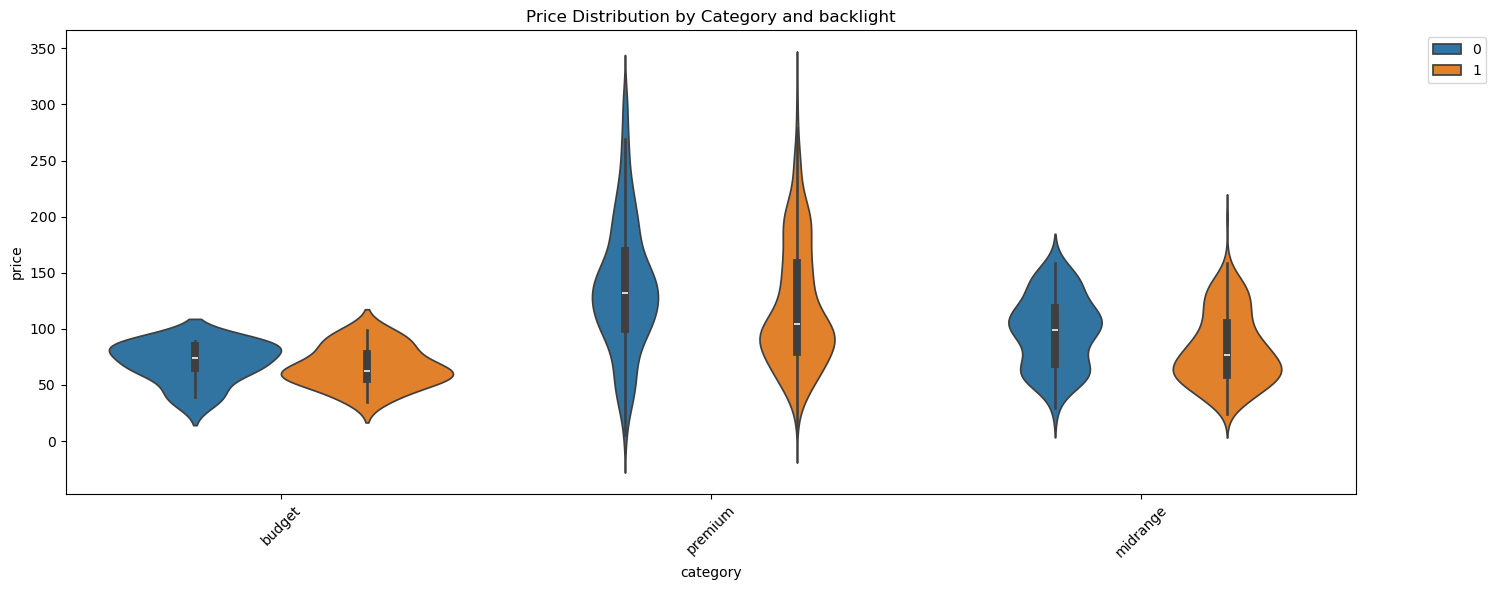

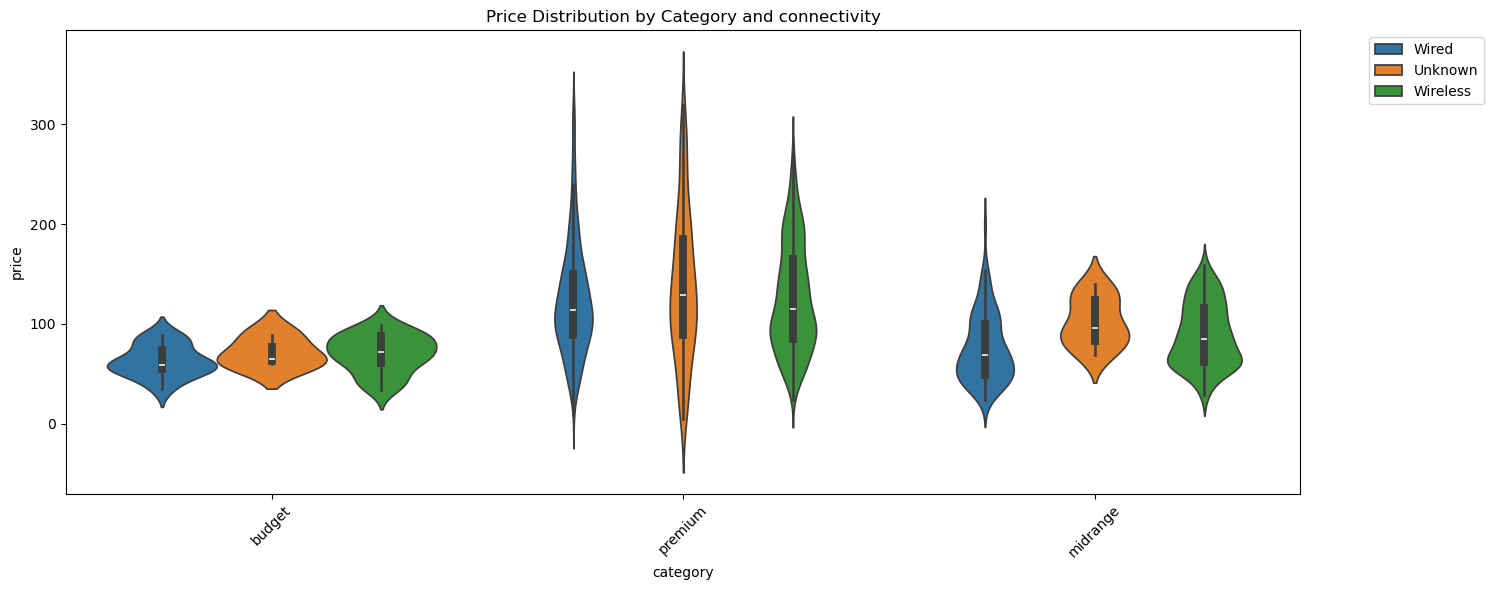

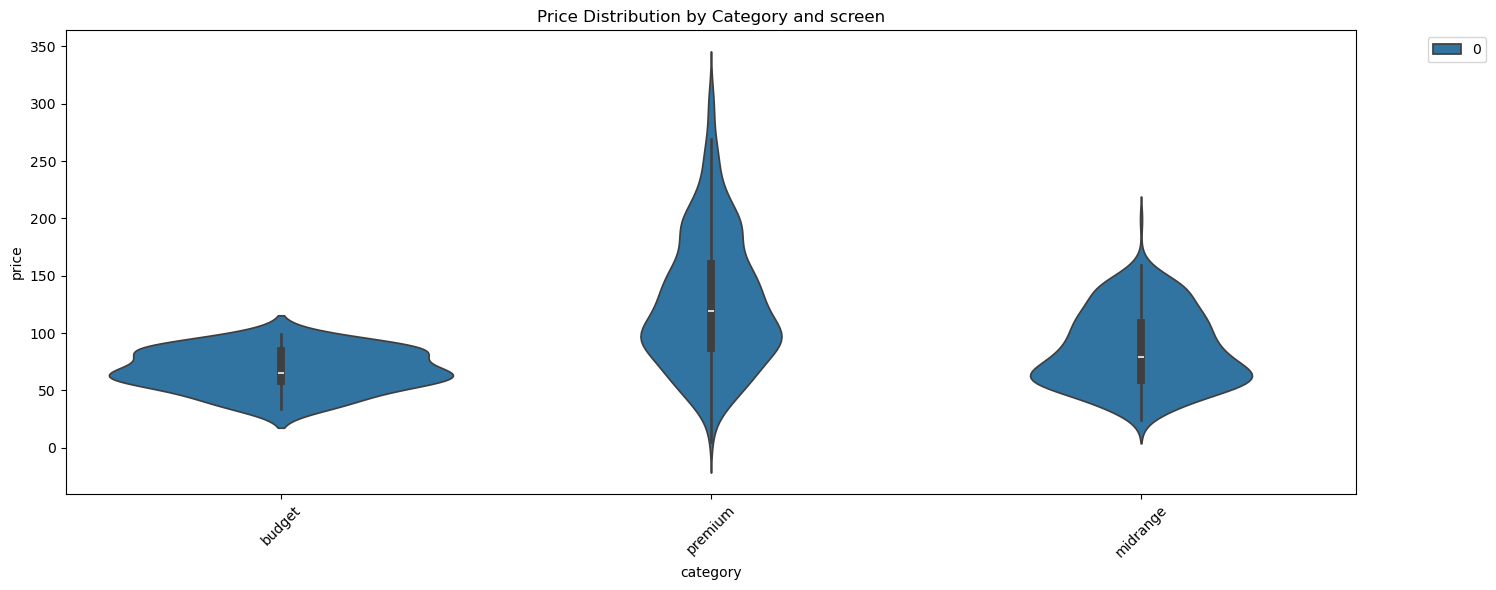

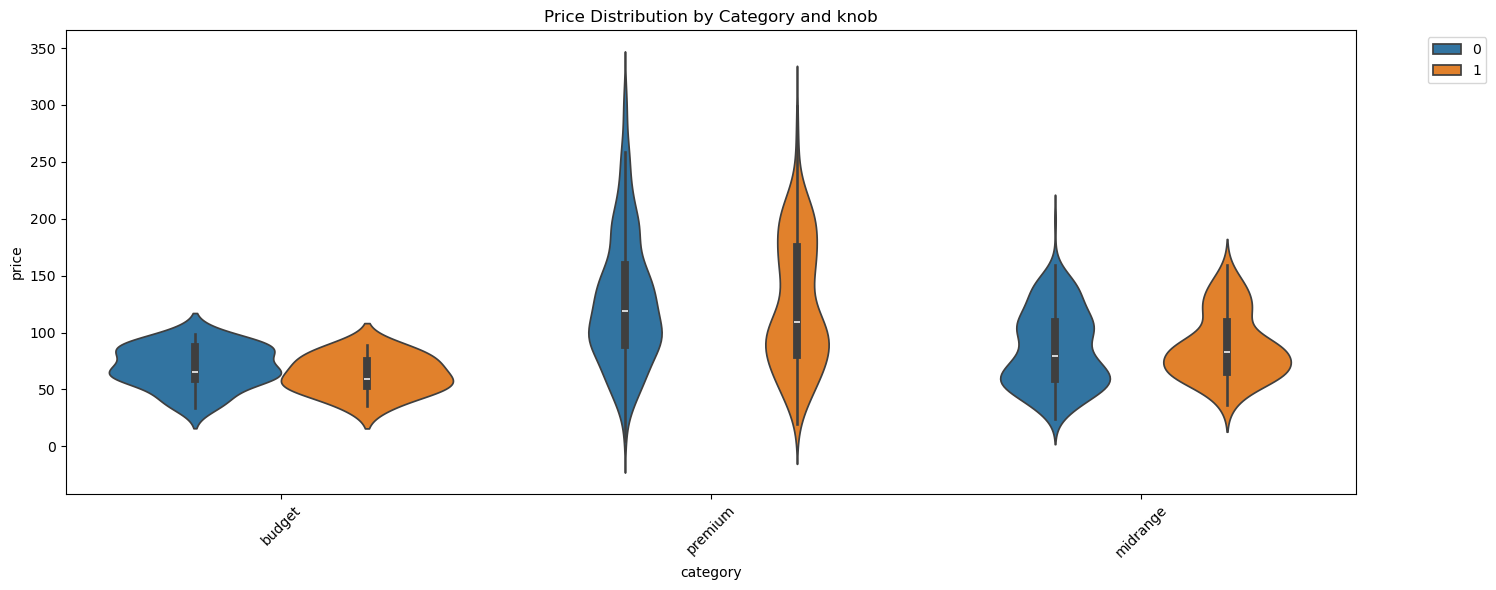

In [35]:
features = ['layout', 'mount', 'hall_effect', 'hotswap', 'case_material', 'backlight', 'connectivity', 'screen', 'knob']

for feature in features:
    plt.figure(figsize=(15, 6))
    sns.violinplot(data=df2, x='category', y='price', hue=feature)
    plt.title(f'Price Distribution by Category and {feature}')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Are any features strongly correlated?
## Are there interactions? (e.g., Premium + Wireless = Higher Price?)



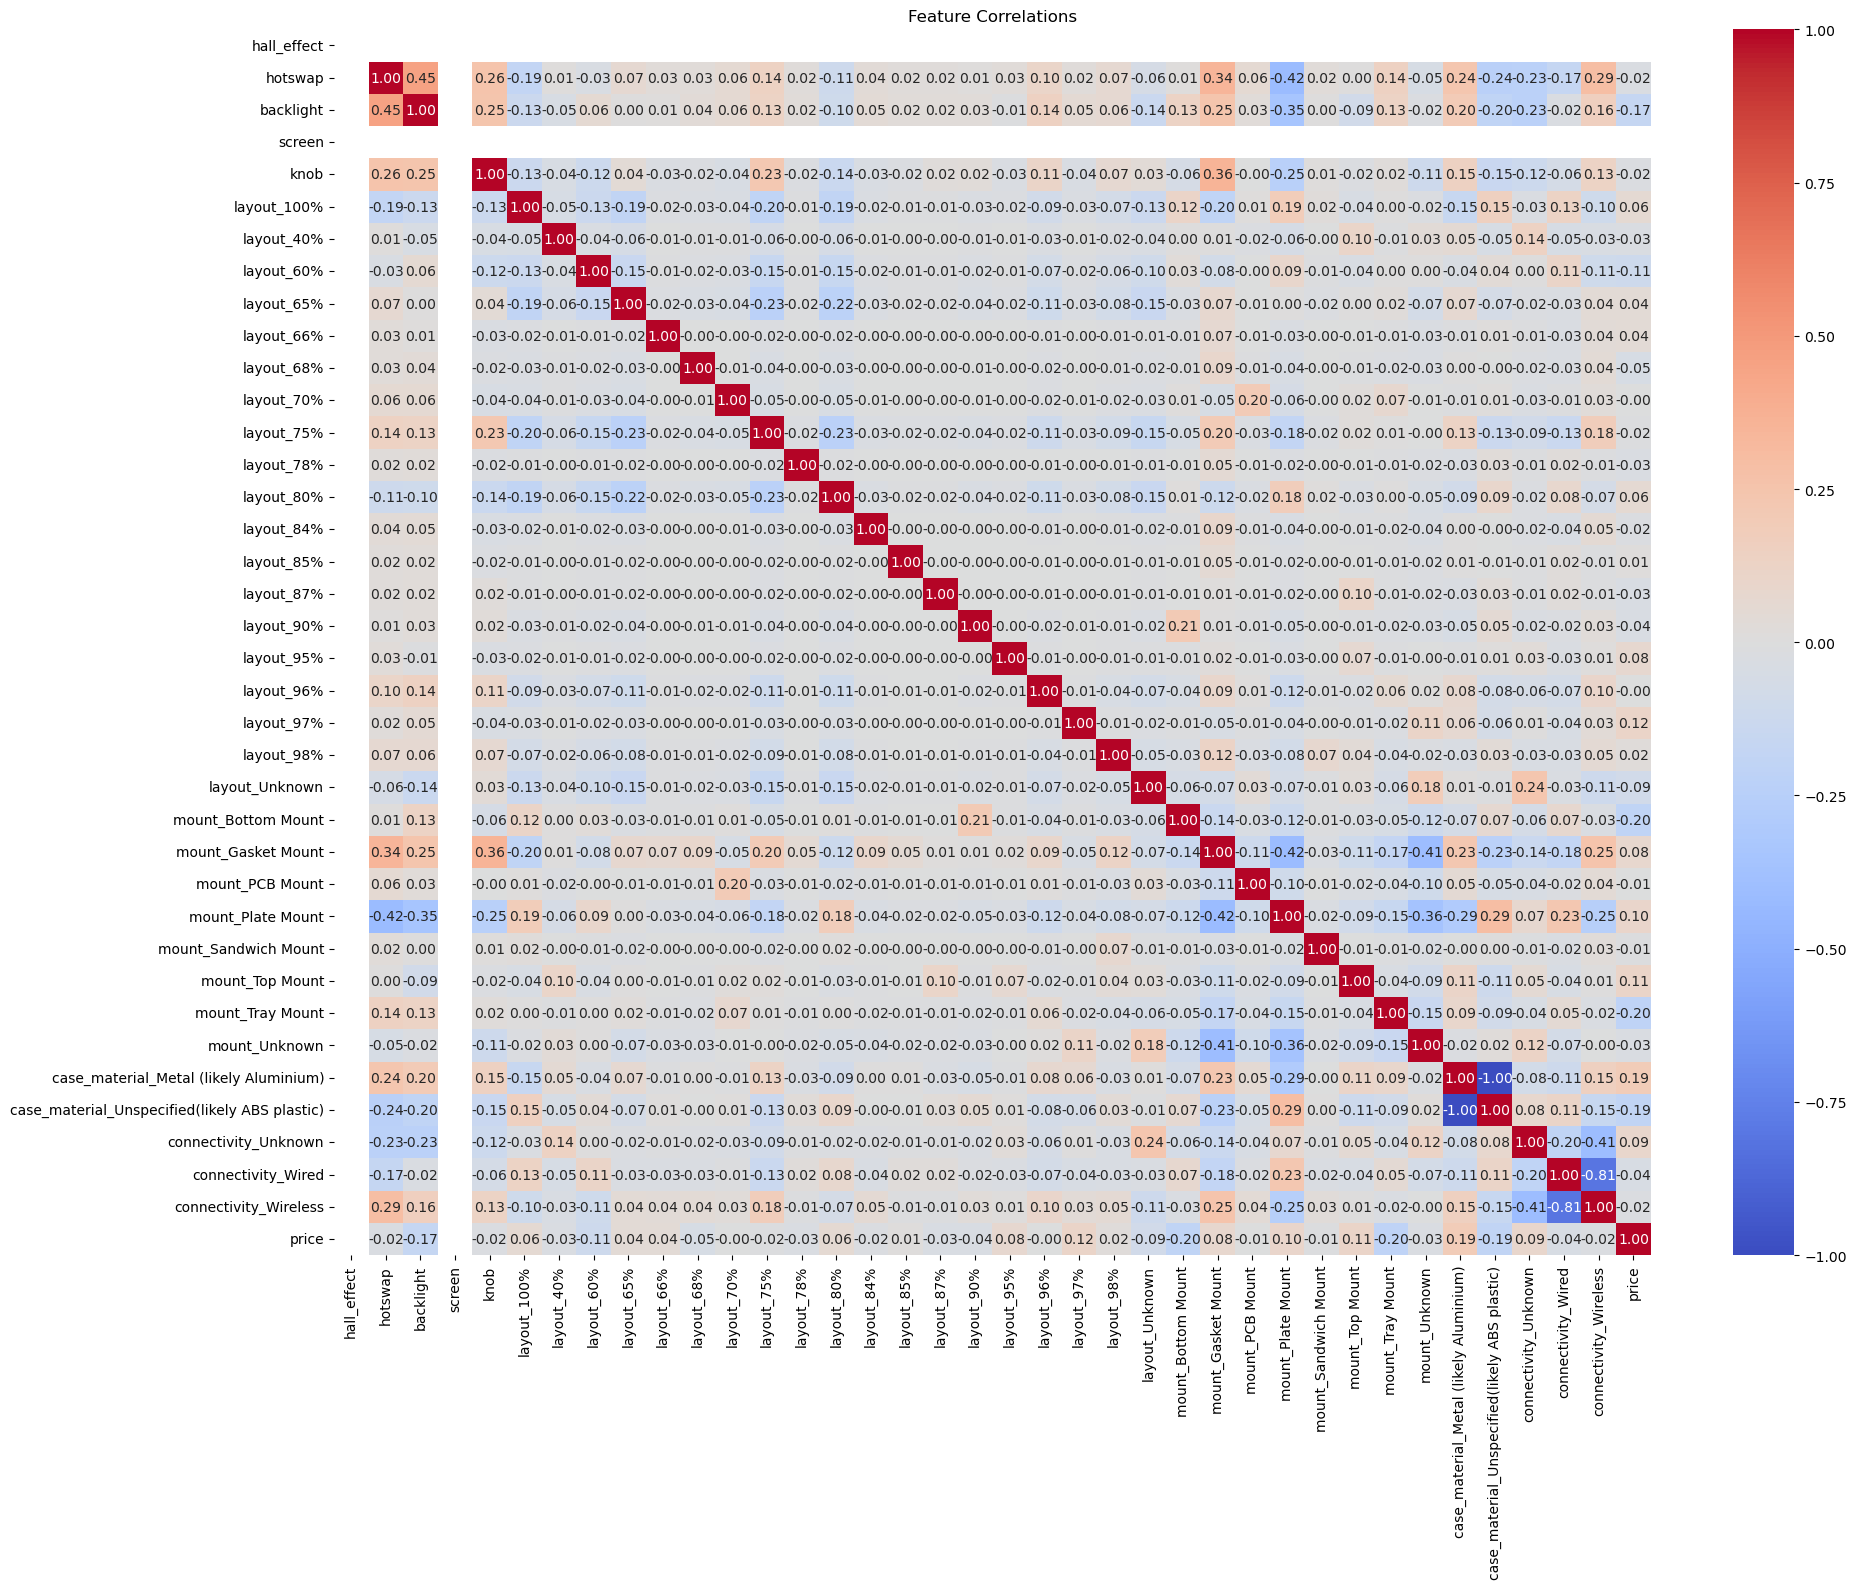

In [ ]:
#!GPT CODE

# First convert categorical variables to dummy variables (one-hot encoding)
# Get dummies for categorical features
categorical_features = ['layout', 'mount', 'case_material', 'connectivity']
df_encoded = pd.get_dummies(df2, columns=categorical_features)

# Include binary features and price
binary_features = ['hall_effect', 'hotswap', 'backlight', 'screen', 'knob']
features_for_correlation = binary_features + [col for col in df_encoded.columns if any(feat in col for feat in categorical_features)] + ['price']

# make matrix
correlation_matrix = df_encoded[features_for_correlation].corr()

# heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlations')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Encoding

In [37]:
# data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [38]:
import joblib

df_encoded = df2.copy()

cat_cols = df_encoded.select_dtypes(include='object').columns
print(cat_cols)
encoders = {}
for col in cat_cols:
    if col != 'title' and col != 'price':
        df_encoded[col] = df_encoded[col].astype(str).fillna('missing')
        le = LabelEncoder()
        df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
        encoders[col] = le

df_encoded.drop(columns=cat_cols, inplace=True)

# joblib.dump(encoders, 'label_encoders.pkl')

df2 = df_encoded

Index(['category', 'brand', 'title', 'layout', 'mount', 'case_material',
       'connectivity'],
      dtype='object')


In [39]:
df2

price  hall_effect  hotswap  backlight  screen  knob  category_encoded  \
0      59.0            0        0          1       0     0                 0   
1      59.0            0        0          1       0     0                 0   
2     169.0            0        1          0       0     0                 2   
3     129.0            0        1          0       0     0                 2   
4     119.0            0        1          0       0     1                 1   
...     ...          ...      ...        ...     ...   ...               ...   
2343  105.0            0        1          1       0     0                 1   
2344   89.0            0        1          1       0     1                 1   
2346  168.0            0        0          0       0     0                 2   
2349  274.0            0        1          0       0     0                 2   
2351  139.0            0        1          1       0     0                 2   

      brand_encoded  layout_encoded  mount_encoded  case_material_encoded  \
0                 0               2              3                      0   
1                 0               2              3                      0   
2                 1               3              1                      0   
3                 1              18              1                      0   
4                 2               9              5                      0   
...             ...             ...            ...                    ...   
2343            177               7              7                      0   
2344            177               7              1                      0   
2346            178               9              7                      1   
2349            179               9              1                      0   
2351            180               1              5                      0   

      connectivity_encoded  
0                        1  
1                        1  
2                        1  
3                        0  
4                        2  
...                    ...  
2343                     2  
2344                     2  
2346                     2  
2349                     0  
2351                     0  

[1876 rows x 12 columns]

In [ ]:
# map cats to num vals
# cat_mapping = {'budget': 0, 'midrange': 1, 'premium': 2}

# create new col for the encoded category
# df2['category_encoded'] = df2['category'].map(cat_mapping)

In [41]:
df2.to_csv('df2.csv', index=False)

In [ ]:
# find corr w price

#corr_df = df2.corr()[['price']].sort_values(by='price', ascending=False)
# corr_df.style.background_gradient(cmap='coolwarm', axis=None)
#corr_df

## model time :D

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error





x=df2.drop(['price'],axis=1) # features
y= df2['price'] #label/target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=21)

In [58]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [47]:
#%pip install xgboost
#%pip install catboost
#%pip install lightgbm



from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool, cv
from lightgbm import LGBMRegressor



In [48]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'GBR': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(),
    'LightGBM': LGBMRegressor(),
}
results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results.append({
        'model':name,
        'R2_score':r2_score(y_test,y_pred),
        'RMSE':mean_squared_error(y_test,y_pred),
    })
results_df = pd.DataFrame(results)
results_df

Learning rate set to 0.043652
0:	learn: 54.9463636	total: 55.3ms	remaining: 55.2s
1:	learn: 54.3504510	total: 55.6ms	remaining: 27.8s
2:	learn: 53.7810429	total: 55.9ms	remaining: 18.6s
3:	learn: 53.1954342	total: 56.1ms	remaining: 14s
4:	learn: 52.7386026	total: 56.4ms	remaining: 11.2s
5:	learn: 52.3645904	total: 56.7ms	remaining: 9.39s
6:	learn: 51.9779129	total: 57ms	remaining: 8.08s
7:	learn: 51.5497346	total: 57.3ms	remaining: 7.1s
8:	learn: 51.1617170	total: 57.5ms	remaining: 6.33s
9:	learn: 50.7398845	total: 57.8ms	remaining: 5.72s
10:	learn: 50.4376834	total: 58.1ms	remaining: 5.22s
11:	learn: 50.1589894	total: 58.3ms	remaining: 4.8s
12:	learn: 49.8036888	total: 58.6ms	remaining: 4.45s
13:	learn: 49.4866690	total: 59.1ms	remaining: 4.16s
14:	learn: 49.2462090	total: 59.4ms	remaining: 3.9s
15:	learn: 48.9555027	total: 59.8ms	remaining: 3.67s
16:	learn: 48.7140834	total: 60ms	remaining: 3.47s
17:	learn: 48.4881979	total: 60.3ms	remaining: 3.29s
18:	learn: 48.2886655	total: 60.6ms

model  R2_score         RMSE
0           Linear Regression  0.131861  2632.183064
1            Ridge Regression  0.131868  2632.162288
2            Lasso Regression  0.126085  2649.693936
3   Support Vector Regression -0.018329  3087.556502
4    Decision Tree Regression  0.319600  2062.961383
5              KNN Regression  0.238392  2309.181596
6    Random Forest Regression  0.493350  1536.155102
7         AdaBoost Regression  0.184832  2471.574915
8                         GBR  0.431779  1722.835061
9                     XGBoost  0.569053  1306.625113
10                   CatBoost  0.548080  1370.212445
11                   LightGBM  0.532924  1416.165540

In [57]:
from xgboost import DMatrix, cv
from sklearn.metrics import mean_squared_error, r2_score

train_dmatrix = DMatrix(X_train, label=y_train)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 12,
    'eta': 0.005,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 5,
    'lambda': 5
}

cv_results = cv(
    params=params,
    dtrain=train_dmatrix,
    num_boost_round=8000,
    nfold=10,
    early_stopping_rounds=100,
    seed=42,
    verbose_eval=False
)

final_rmse = cv_results['test-rmse-mean'].iloc[-1]
print(f"Final RMSE: {final_rmse:.4f}")

model_mse = final_rmse ** 2
baseline_mse = mean_squared_error(y_train, [y_train.mean()] * len(y_train))

r2_score_cv = 1 - (model_mse / baseline_mse)
print(f"Cross-Validated R² Score: {r2_score_cv:.4f}")


Final RMSE: 34.7722
Cross-Validated R² Score: 0.6087


In [50]:
from xgboost import XGBRegressor

model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    max_depth=12,
    learning_rate=0.005, 
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    reg_lambda=5,         
    n_estimators=8000      
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.005, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=8000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# check importance of cols

# df_importance = pd.DataFrame({'feature':x.columns,'importance':pipeline.named_steps['regressor'].feature_importances_})
# df_importance = df_importance.sort_values(by='importance', ascending=False)
# df_importance


In [52]:
import gradio as gr
import joblib
print(gr.__version__)

5.25.2


In [ ]:
joblib.dump(model,'model.joblib')

['model.joblib']

# Gradio Demo

In [54]:
#X_train, X_test

In [55]:
# check what brands we working with

# brand_df2 = df['brand'].unique
# brand_df2 = df['brand'].drop_duplicates()
# brand_df2 = pd.DataFrame(brand_df2)
# brand_df2.to_csv('brand_df2.csv', index=False)

In [ ]:
# model load
model2 = joblib.load('model.joblib')

def predict_keyboard_price(category, brand, layout, mount, case_material, connectivity, hall_effect, hotswap, backlight, screen, knob):
    # map cat to its num val
    category_map = {
    "budget": 0,
    "midrange": 1,
    "premium": 2
}
    brand_map = {
    "0.01": 0, "80retros": 1, "8BitDo": 2, "ACGAM": 3, "AULA": 4,
    "Ajazz": 5, "Akko": 6, "Alpaca": 7, "Angel": 8, "Anne": 9,
    "Apos": 10, "Azio": 11, "BAROCCOMISTEL": 12, "BASIC": 13, "Backspace": 14,
    "Bat": 15, "Binepad": 16, "CKW": 17, "Cerakey": 18, "Cherry": 19,
    "Chilkey": 20, "Cidoo": 21, "ColorReco": 22, "Coolkiller": 23, "Corsair": 24,
    "Createkeebs": 25, "DOIO": 26, "Dagk": 27, "Dareu": 28, "Daring": 29,
    "Darmoshark": 30, "Deadline": 31, "Dell": 32, "Denshi": 33, "Desktop": 34,
    "Double": 35, "Ducky": 36, "Dukharo": 37, "Durgod": 38, "Dwarf": 39,
    "Epomaker": 40, "Everglide": 41, "Evoworks": 42, "Fancy": 43, "Fantech": 44,
    "Feker": 45, "Fiio": 46, "Filco": 47, "Firstblood": 48, "Fly": 49,
    "Fl·esports": 50, "Fopato": 51, "Furycube": 52, "GDK": 53, "GMMK": 54,
    "GamaKay": 55, "Ganss": 56, "Gateron": 57, "GeekElite": 58, "Geeksdontpanic": 59,
    "Geon": 60, "Glorious": 61, "GravaStar": 62, "HEXCORE": 63, "HHKB": 64,
    "HIBI": 65, "Heavy": 66, "Hexgears": 67, "Hiexa": 68, "Homoo": 69,
    "IQUNIX": 70, "Idobao": 71, "Ikbc": 72, "Jamesdonkey": 73, "KBDFans": 74,
    "KBParadise": 75, "KEBOHUB": 76, "KEEBD": 77, "Kailh": 78, "Kataaa": 79,
    "Kbdcraft": 80, "Keebwerk": 81, "Kemove": 82, "Keychron": 83, "Keycool": 84,
    "Keydous": 85, "KeysMe": 86, "Kiiboom": 87, "Knife": 88, "LUMINKEY": 89,
    "Lelelab": 90, "Lenovo": 91, "Leobog": 92, "Leopold": 93, "LingBao": 94,
    "Lofree": 95, "MCHOSE": 96, "MIIIW": 97, "MIKIT": 98, "MK": 99,
    "MMkeyboard": 100, "Machenike": 101, "Magicforce": 102, "Maniac": 103, "Matias": 104,
    "Mechboards": 105, "Mek": 106, "Meko": 107, "MelGeek": 108, "Meletrix": 109,
    "Miel": 110, "Mistel": 111, "Modokey": 112, "Monka": 113, "Monokei": 114,
    "Monsgeek": 115, "Mxrskey": 116, "NIUNIU": 117, "Neo": 118, "Newmen": 119,
    "NextTime": 120, "Niuniu": 121, "Niz": 122, "NlZ": 123, "Noppoo": 124,
    "Novelkeys": 125, "Nuphy": 126, "Obinslab": 127, "Odin": 128, "Outemu": 129,
    "Play": 130, "Protozoa": 131, "Pwnage": 132, "Qelec.Studio": 133, "Qwertykeys": 134,
    "REDMAGIC": 135, "RX": 136, "Razer": 137, "Realforce": 138, "Reccazr": 139,
    "Redragon": 140, "Rog": 141, "Royal": 142, "Royalaxe": 143, "Shortcut": 144,
    "Shurikey": 145, "Sikakeyb": 146, "Skyloong": 147, "Swagkeys": 148, "Tech": 149,
    "Tex": 150, "Thunderobot": 151, "Titan": 152, "Typone": 153, "UGREEN": 154,
    "VTER": 155, "Varmilo": 156, "Velocifire": 157, "Vgn": 158, "Vortex": 159,
    "WOBKEY": 160, "Weikav": 161, "WhatGeek": 162, "Wind": 163, "Womier": 164,
    "Wuque": 165, "Wusikey": 166, "X-Bows": 167, "XVX": 168, "Xiaomi": 169,
    "Xinmeng": 170, "Yunzii": 171, "Zer": 172, "Zerodate": 173, "Zuoya": 174,
    "dumang": 175, "grid": 176, "iBlancod": 177, "iFLYTEK": 178, "m.one": 179,
    "sam": 180
}
    
    layout_map = {
    "100%": 0,
    "40%": 1,
    "60%": 2,
    "65%": 3,
    "66%": 4,
    "68%": 5,
    "70%": 6,
    "75%": 7,
    "78%": 8,
    "80%": 9,
    "84%": 10,
    "85%": 11,
    "87%": 12,
    "90%": 13,
    "95%": 14,
    "96%": 15,
    "97%": 16,
    "98%": 17,
    "Unknown": 18
}
    mount_map = {
    "Bottom Mount": 0,
    "Gasket Mount": 1,
    "PCB Mount": 2,
    "Plate Mount": 3,
    "Sandwich Mount": 4,
    "Top Mount": 5,
    "Tray Mount": 6,
    "Unknown": 7
}
    case_material_map = {
    "Metal (likely Aluminium)": 0,
    "Unspecified(likely ABS plastic)": 1
}
    connectivity_map = {
    "Unknown": 0,
    "Wired": 1,
    "Wireless": 2
}
    
    # input dict
    input_data = {
        'hall_effect': hall_effect,
        'hotswap': hotswap,
        'backlight': backlight,
        'screen': screen,
        'knob': knob,
        'category_encoded': category_map[category],
        'brand_encoded': brand_map[brand],
        'layout_encoded': layout_map[layout],
        'mount_encoded': mount_map[mount],
        'case_material_encoded': case_material_map[case_material],
        'connectivity_encoded': connectivity_map[connectivity],
    }

    # print(input_data)

    input_df = pd.DataFrame([input_data])

    # predict
    prediction = model2.predict(input_df)
    return f"Predicted Price: ${prediction[0]:.2f}"

# gradio frontend start
with gr.Blocks(title='Keyboard Price Prediction Demo') as demo:
    gr.Markdown('## Mechanical Keyboard Price Predictor')
    
    with gr.Row():
        with gr.Column():
            # features
            category = gr.Radio(
                choices=['budget', 'midrange', 'premium'],
                label='Category',
                value='midrange'
            )
            brands = gr.Dropdown(
                choices = [
    "0.01", "80retros", "8BitDo", "ACGAM", "ATTACK", "AULA", "Ace", "Aesco", "Aiglatson", "Ajazz", "Akko",
    "Alpaca", "Angel", "Anne", "Apos", "Azio", "BAROCCOMISTEL", "BASIC", "Backspace", "Bat", "Binepad", "Black",
    "CKW", "Cerakey", "Cherry", "Chilkey", "Cidoo", "ColorReco", "Coolkiller", "Corsair", "Createkeebs", "DOIO",
    "Dagk", "Dareu", "Daring", "Darmoshark", "Deadline", "Dell", "Delux", "Denshi", "Design", "Desktop", "Double",
    "DrunkDeer", "Dskeyboard", "Ducky", "Dukharo", "Durgod", "Dwarf", "Dygma", "Endgame", "Epomaker", "Ergodox",
    "Everglide", "Evoworks", "Fancy", "Fantech", "Feker", "Fiio", "Filco", "Firstblood", "Fly", "Fl·esports",
    "Fopato", "Furycube", "GDK", "GMK", "GMMK", "GamaKay", "Ganss", "Gateron", "GeekElite", "Geeksdontpanic",
    "Geon", "Glorious", "Gopolar", "GravaStar", "HEXCORE", "HHKB", "HIBI", "HMX", "Haverworks", "Heavy", "Helix",
    "Hexgears", "Hiexa", "Homoo", "Hyeku", "IQUNIX", "Idobao", "Ikbc", "Infiverse", "Irok", "Jamesdonkey",
    "KBDFans", "KBParadise", "KEBOHUB", "KEEBD", "Kailh", "Kataaa", "Kbdcraft", "Keebwerk", "Kemove", "Kenny42",
    "Keychron", "Keycool", "Keydous", "KeysMe", "Kiiboom", "Knife", "LANGTU", "LUMINKEY", "Lelelab", "Lenovo",
    "Leobog", "Leopold", "LingBao", "Lofree", "MCHOSE", "METAPHYUNI", "MIIIW", "MIKIT", "MK", "MM", "MMkeyboard",
    "Machenike", "Magicforce", "Maniac", "Matias", "Mechboards", "Mek", "Meko", "MelGeek", "Meletrix", "Miel",
    "Mistel", "Modokey", "Monka", "Monokei", "Monsgeek", "Mxrskey", "NIUNIU", "NPK", "Neo", "Newmen", "Newone",
    "NextTime", "Niuniu", "Niz", "NlZ", "Noppoo", "Novelkeys", "Nuphy", "Obinslab", "Odin", "Outemu", "Outva",
    "Piifox", "Play", "Protozoa", "Pwnage", "Qelec.Studio", "Qwertykeys", "REDMAGIC", "RX", "Razer", "Realforce",
    "Reccazr", "Redragon", "Rog", "Royal", "Royalaxe", "Shortcut", "Shurikey", "Sikakeyb", "Skyloong", "Sp-star",
    "Steelseries", "Sunkey", "Swagkeys", "Tech", "Tex", "Thunderobot", "Titan", "Typone", "UGREEN", "VALKYRIE",
    "VTER", "Varmilo", "Velocifire", "Vgn", "Vortex", "WOBKEY", "Weikav", "WhatGeek", "Whatever", "Wind", "Womier",
    "Wuque", "Wusikey", "X-Bows", "XVX", "Xiaomi", "Xinmeng", "Yunzii", "Zer", "Zerodate", "Zuoya",
    "dumang", "grid", "iBlancod", "iFLYTEK", "keyno", "m.one", "sam", "velocifiretech", "wilba.tech", "zFrontier"
],
                label='Brand',
            )
            
            layout = gr.Radio(
                choices=['60%', '65%', '75%', '80%', '100%'], 
                label='Layout'
            )
            
            

            mount = gr.Radio(
                choices=['Plate Mount', 'PCB Mount', 'Gasket Mount'],  
                label='Mount Type'
            )
            
            case_material = gr.Radio(
                choices=['Metal (likely Aluminium)', 'Unspecified(likely ABS plastic)'],
                label='Case Material'
            )
            
            connectivity = gr.Radio(
                choices=['Wired', 'Wireless'],  
            )
            
            hall_effect = gr.Radio(
                choices=[0, 1],
                label='Hall Effect',
                value=0
            )
            
            hotswap = gr.Radio(
                choices=[0, 1],
                label='Hotswap',
                value=0
            )
            
            backlight = gr.Radio(
                choices=[0, 1],
                label='Backlight',
                value=0
            )
            
            screen = gr.Radio(
                choices=[0, 1],
                label='Screen',
                value=0
            )
            
            knob = gr.Radio(
                choices=[0, 1],
                label='Knob',
                value=0
            )
            
            predict_button = gr.Button('Predict Price')
            prediction_output = gr.Textbox(label='Predicted Price', value='Click predict to see the price')
    
    predict_button.click(
    fn=predict_keyboard_price,
    inputs=[category, brands, layout, mount, case_material, connectivity,
            hall_effect, hotswap, backlight, screen, knob],
    outputs=prediction_output
)

if __name__ == '__main__':
    demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/gradio/blocks.py", line 2136, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/gradio/blocks.py", line 1662, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thre